# 3 Levels of Analysis

* Level 0 : Getting Started
* Level 1 : Univariate Analysis
* Level 2 : Bi-Variate Analysis
* Level 3 : Multivariate Analysis and asking questions from the data 

## Level 0 Tasks (Getting Started) 

1.Visually inspect the first few and last few rows of the data \
2.Check the shape of the data frame \
3.Check the count of null values in each column \
4.Inspect all the column names and cross check with the data dictionary \
5.Check the information of the data frame using the info() function

### Importing the necessary libraries 

In [ ]:
import matplotlib.pyplot as plt             # to visualize
from tabulate import tabulate               # to print the table
import matplotlib as mat                    # to visualize 
import seaborn as sns                       # to visualize
import pandas as pd                         # for data reading
import numpy as np        

In [11]:
# Check for the version of the libraries
print("Pandas version: ",pd.__version__)
print("Seaborn version: ",sns.__version__)
print("Matplotlib version: ",mat.__version__)

Pandas version:  1.3.5
Seaborn version:  0.12.1
Matplotlib version:  3.5.3


### Reading the file 

In [12]:
df=pd.read_csv("DS1_C6_S3_BazilHousing_Data_Hackathon.csv")

# Level 0 analysis

### Reading the top 5 rows 

In [13]:
df.head()

city  area  rooms  bathroom  parking spaces  floor     animal  \
0     São Paulo    70      2         1               1      7      acept   
1     São Paulo   320      4         4               0     20      acept   
2  Porto Alegre    80      1         1               1      6      acept   
3  Porto Alegre    51      2         1               0      2      acept   
4     São Paulo    25      1         1               0      1  not acept   

       furniture  hoa (R$)  rent amount (R$)  property tax (R$)  \
0      furnished      2065              3300                211   
1  not furnished      1200              4960               1750   
2  not furnished      1000              2800                  0   
3  not furnished       270              1112                 22   
4  not furnished         0               800                 25   

   fire insurance (R$)  total (R$)  
0                   42        5618  
1                   63        7973  
2                   41        3841  
3                   17        1421  
4                   11         836

### Reading the bottom 5 rows

In [14]:
df.tail() # tail returns the bottom 5 rows

city  area  rooms  bathroom  parking spaces  floor  \
10687    Porto Alegre    63      2         1               1      5   
10688       São Paulo   285      4         4               4     17   
10689  Rio de Janeiro    70      3         3               0      8   
10690  Rio de Janeiro   120      2         2               2      8   
10691       São Paulo    80      2         1               0      0   

          animal      furniture  hoa (R$)  rent amount (R$)  \
10687  not acept      furnished       402              1478   
10688      acept  not furnished      3100             15000   
10689  not acept      furnished       980              6000   
10690      acept      furnished      1585             12000   
10691      acept  not furnished         0              1400   

       property tax (R$)  fire insurance (R$)  total (R$)  
10687                 24                   22        1926  
10688                973                  191       19260  
10689                332                   78        7390  
10690                279                  155       14020  
10691                165                   22        1587

###  Number of rows and columns 

In [15]:
print(df.shape) #returns a tuple of number of rows and columns 

(10692, 13)


### Names of all the columns

In [16]:
print(df.columns) # returns array of columns in dataset 

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')


### Dataset information

In [17]:
df.info()       # returns the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 960.7+ KB


### Checking if there are null values in any columns

In [18]:
df.isnull().sum()       # isnull returns the True/False dataframe
                            #sum: counts the number of True in columns

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

### There is no null values present in data

# LEVEL 1 Analysis 
-------------------------
Identify the type of data in each column (categorical or numerical)?
1. Seperate out the categorical columns from the numerical types

### Following are the kinds of analysis that can be performed on categorical data:
1. Check if the variable is  Nominal or Ordinal.
2. Check how many categories are present in a variable.
3. Check the Mode of a variable.
4. Check for Missing values of a variable.
5. Think how the missing values could be treated.
6. What kind of graph/chart can be plotted using this data.

Note: We are analyzing only one column at a time (a.k.a. Univariate Analysis)

### Separating Categorical and Numerical Variables

In [19]:
# Seprating out the categorical and continuous variables
def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:                # looping on the number of columns
        if df[column].nunique() < 43:       # nunique:  returns unique values in the column,
                                                    #here 43 is the hyperparamter and can be changed
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(df)         # Calling the function

# # Tabulate is a package used to print the list, dict or any data sets in a proper format; in table format
from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "Continuous": continuous}, headers = ["categorical", "continuous"]))

categorical     continuous
--------------  -------------------
city            area
rooms           hoa (R$)
bathroom        rent amount (R$)
parking spaces  property tax (R$)
floor           fire insurance (R$)
animal          total (R$)
furniture



# $$\;\;\;\; Univariate \ Analysis \ of \ Categorical \ Variables$$

## Level 1 Analysis

# 1. Analysis of City wise population:  
LEVEL 1 Analysis of Categorical Data (Univariate Analysis) 

In [20]:
def cat_graph(colmun_name,title):
    fig, ax = plt.subplots(1, 2, figsize = (15, 7))
    ax[0].set_title(f'{title}')                  # Set the title of the graph
    percentage = colmun_name.value_counts()         # value_counts: returns the count of values in series: return series
    labels = list(colmun_name.value_counts().index) # Converting the index of value counts into list

    sns.countplot(x =colmun_name, ax = ax[0])
    plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 
    
    plt.show()
    

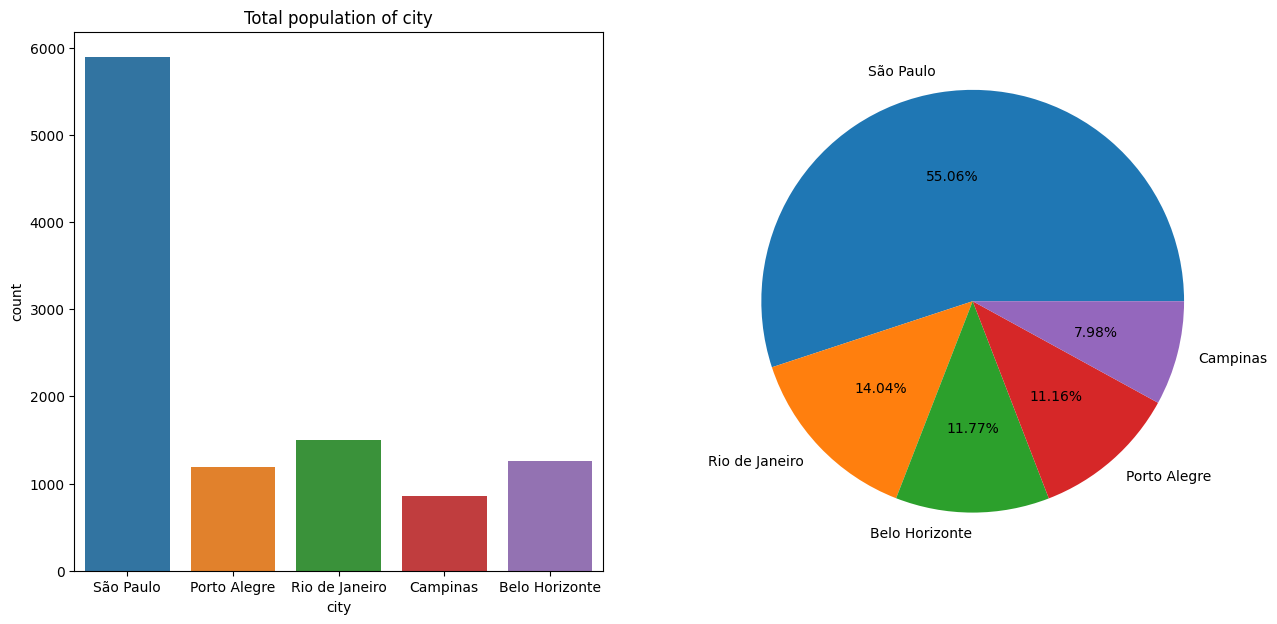

In [21]:
cat_graph(df.city,"Total population of city")

## ***Interpretation: Approx 55% of total population living in sao paulo city 

# 1. Analysis of Rooms wise population:  


In [22]:
df.rooms.unique()

array([ 2,  4,  1,  3,  7,  5,  8,  6, 10, 13,  9], dtype=int64)

In [23]:
def cat_graph_explode(columns,title, pie = True):
    z=list(np.arange(0,1,1/(len(columns.unique())-0.10),dtype=float))
    
    if len(z)<=5:
        data = columns.value_counts()
        pie, ax = plt.subplots(1, 2, figsize = [20,6])
        labels =data.keys()                                                        
        ax[0].pie(x = data, explode = z, labels = labels,autopct= "%0.2f%%")
        sns.countplot(x = columns, ax = ax[1], order = columns.value_counts().index)                                                                                               
        plt.title(title)                                                  
        plt.show()
    else:
        data = columns.value_counts()
        pie, ax = plt.subplots(figsize = [20,6])
        labels =data.keys()                                                        
        sns.countplot(x = columns, ax = ax, order = columns.value_counts().index)                                                                                               
        plt.title(title)                                                  
        plt.show()

In [24]:
def cat_graph_explode1(columns,title,pie=True):
    z=list(np.arange(0,1,1/(len(columns.unique())-0.10),dtype=float))
    
    if pie:
        data = columns.value_counts()
        pie, ax = plt.subplots(1, 2, figsize = [20,6])
        labels =data.keys()                                                        
        ax[0].pie(x = data, explode = z, labels = labels,autopct= "%0.2f%%")
        sns.countplot(x = columns, ax = ax[1], order = columns.value_counts().index)                                                                                               
        plt.title(title)                                                  
        plt.show()
    else:
        data = columns.value_counts()
        pie, ax = plt.subplots(figsize = [20,6])
        labels =data.keys()                                                        
        sns.countplot(x = columns, ax = ax, order = columns.value_counts().index)                                                                                               
        plt.title(title)                                                  
        plt.show()

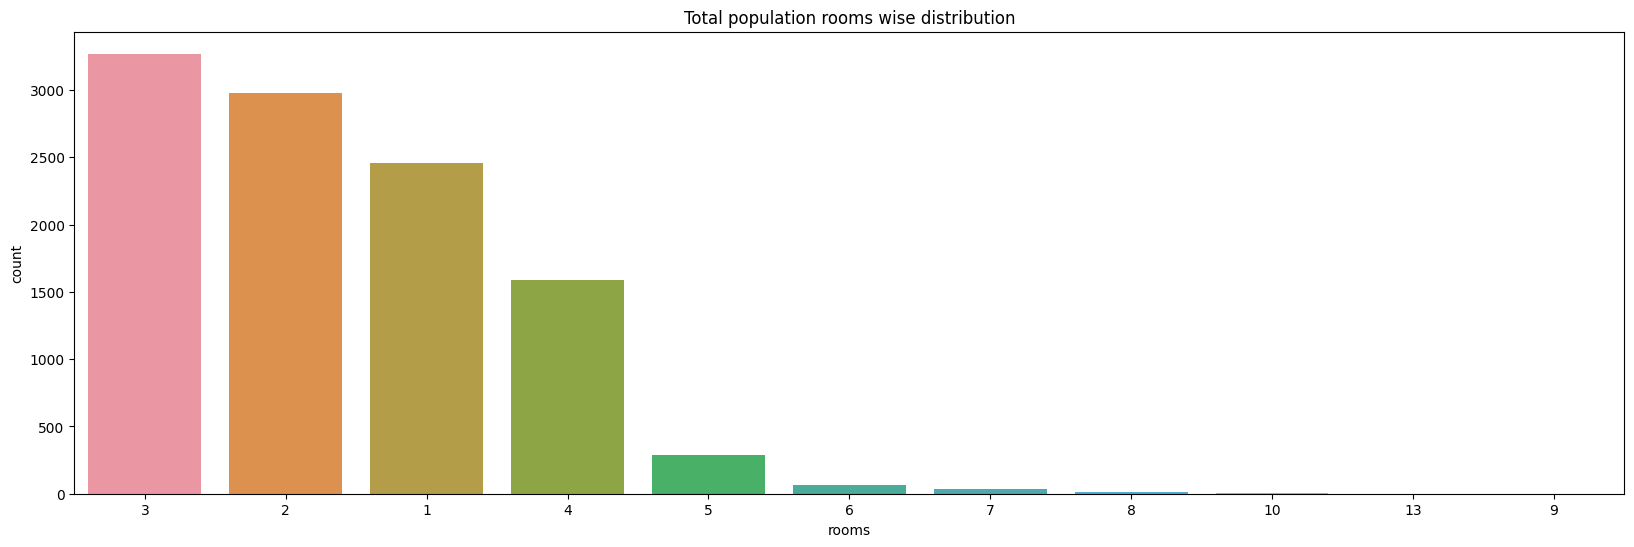

In [25]:
cat_graph_explode(df.rooms,'Total population rooms wise distribution')

## *** Interpretation: 1. Approx. 50% of population consist of either 1 or 2 rooms.
##                     3. Approx. 4% of population having 5 or more than 5 rooms. 

# 1. Analysis of Bathroom wise population:  


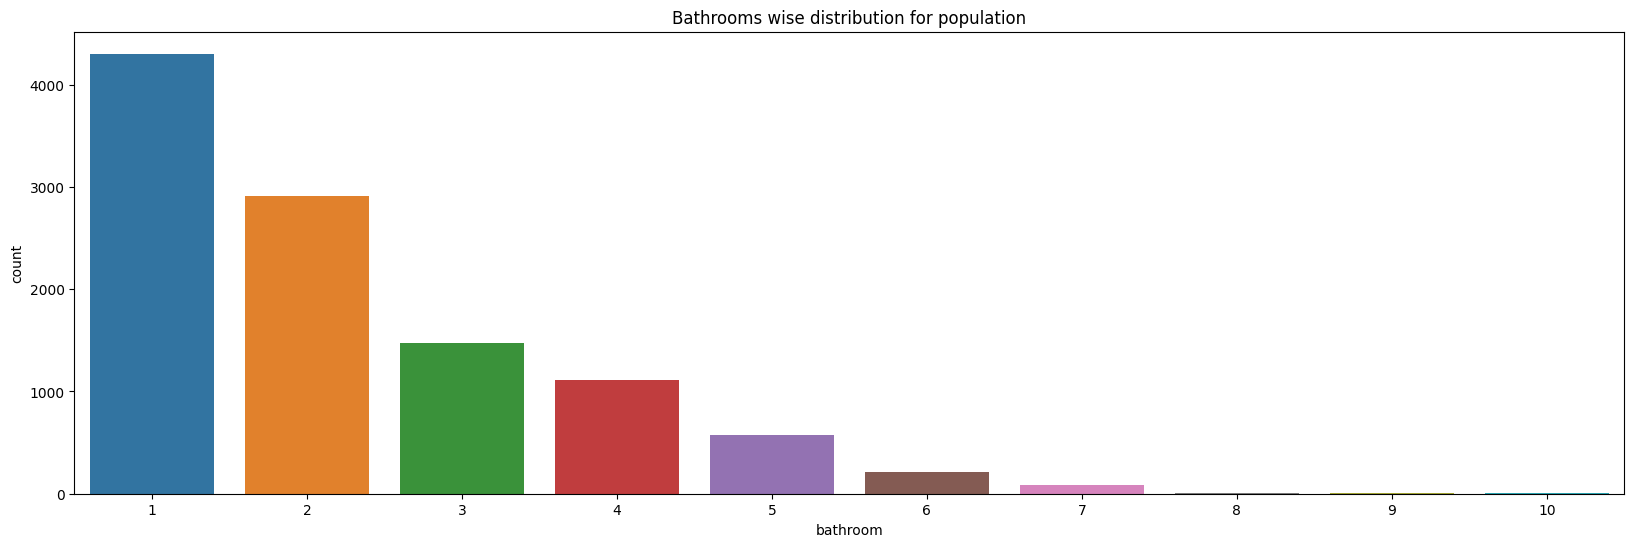

In [26]:
cat_graph_explode(df.bathroom,'Bathrooms wise distribution for population',pie=False)

## *** Interpretation: 1. Approx. 40% of population having single bathroom.
##                     2. Approx. 80% of population are having less than 3 bathrooms.
##                     3. Approx. 3% of population are having more than 5 bathrooms. 

# 1. Analysis of parking spaces wise population:  


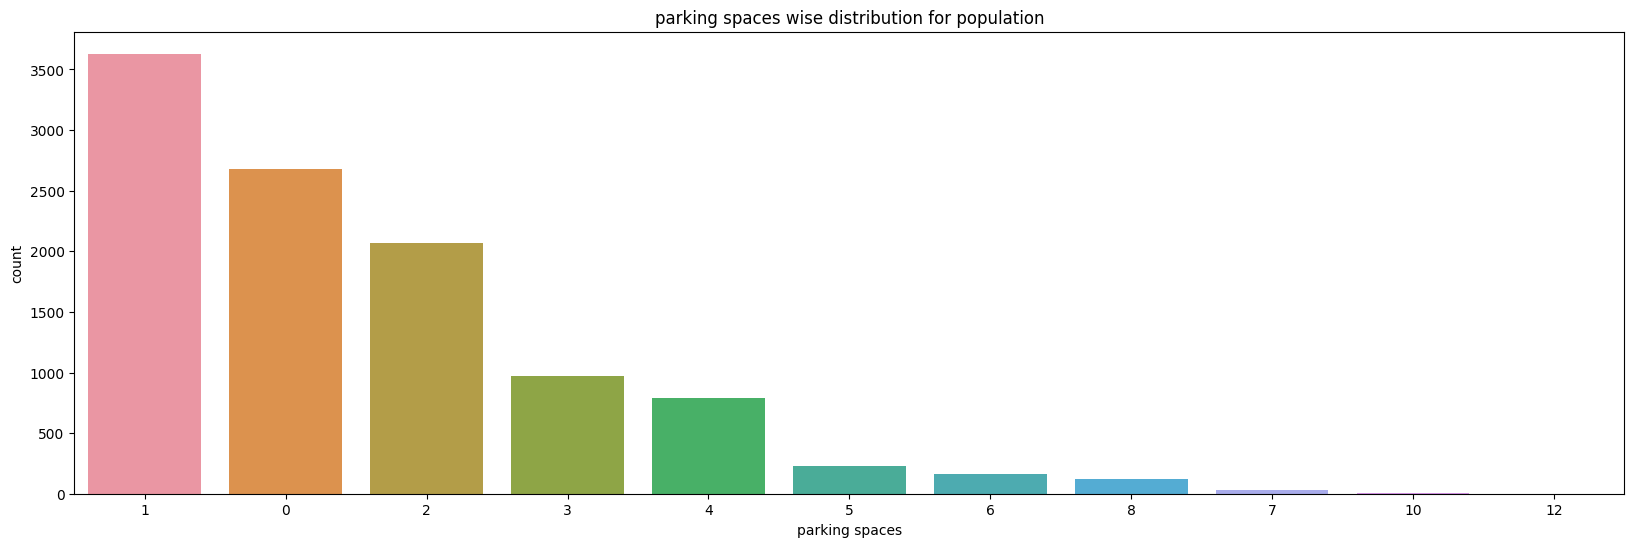

In [27]:
cat_graph_explode(df['parking spaces'],'parking spaces wise distribution for population',pie=False)

## *** Interpretation: 1. Approx. 25% of population having no parking space.
##                     2. Approx. 50% of population having either 1 or 2 parking spaces.
##                     3. Approx. 25% of population having 3 or more than 3 no. of parking spaces. 

# 1. Analysis of floor wise population:  

In [28]:
df.floor.unique()

array([  7,  20,   6,   2,   1,   0,   4,   3,  10,  11,  24,   9,   8,
        17,  18,   5,  13,  15,  16,  14,  26,  12,  21,  19,  22,  27,
        23,  35,  25,  46,  28,  29, 301,  51,  32], dtype=int64)

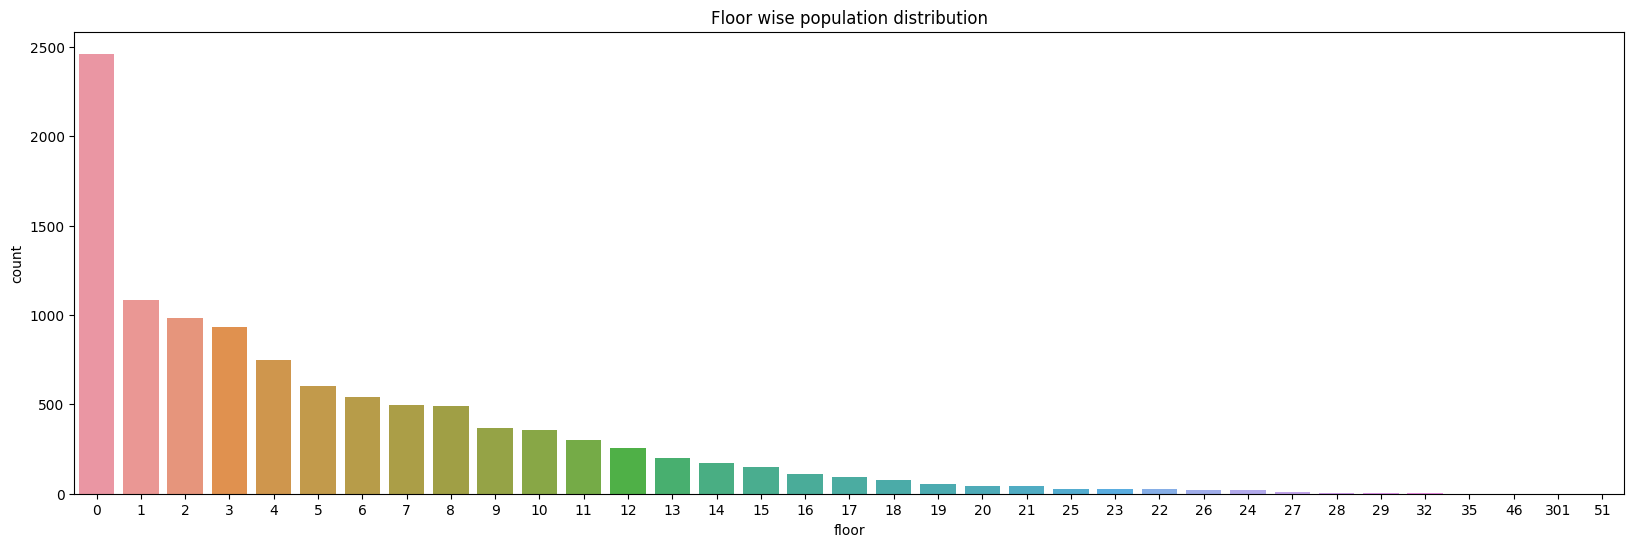

In [29]:
cat_graph_explode(df.floor,'Floor wise population distribution')

# 1. Analysis of population having animals:  


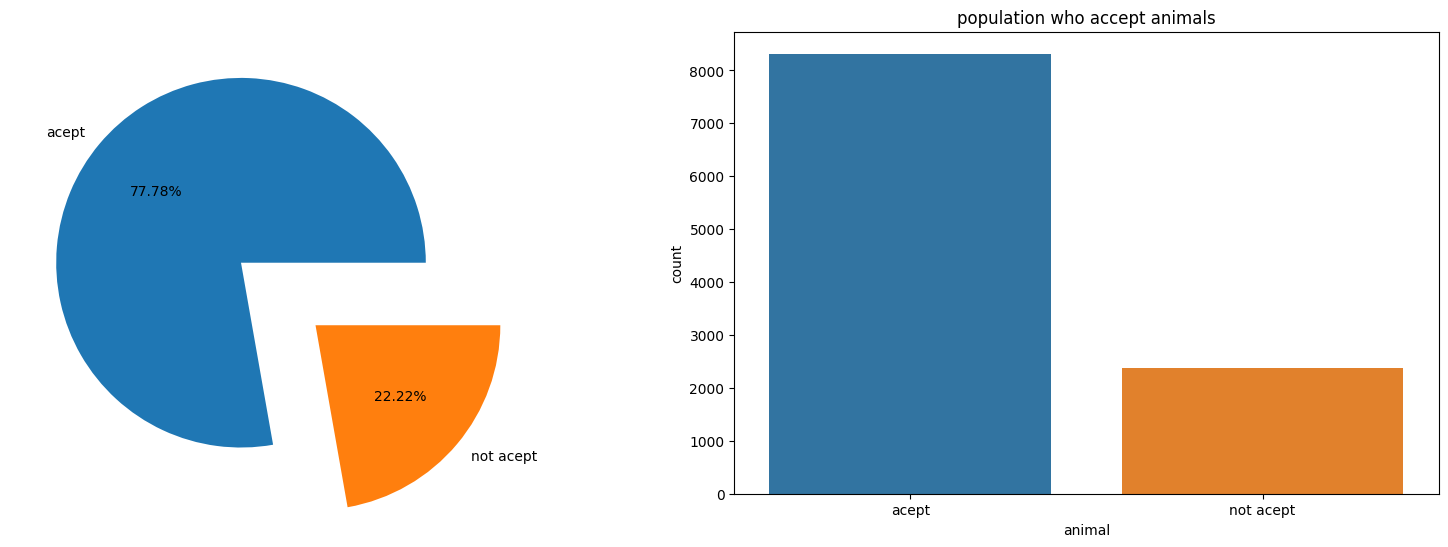

In [30]:
cat_graph_explode(df.animal,'population who accept animals')

## *** Interpretation: 1. Approx. 3/4th of population accept animal.

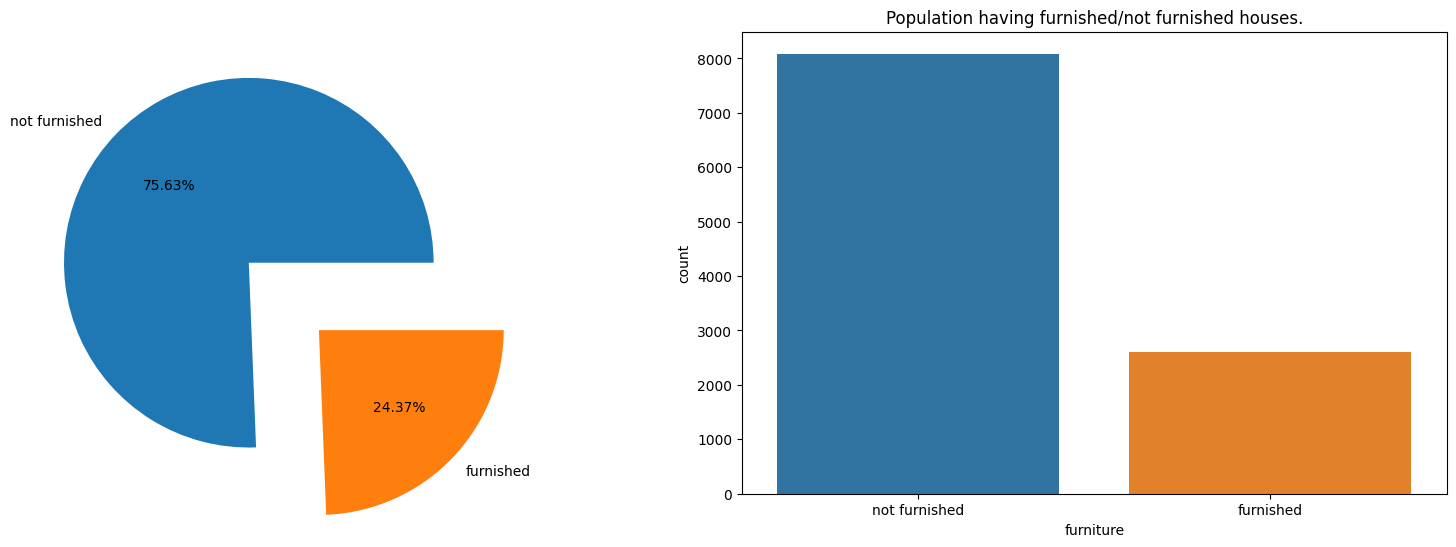

In [31]:
cat_graph_explode(df.furniture,'Population having furnished/not furnished houses.')

## *** Interpretation: 1. Approx. 1/4th of population having furnished property.

# $$\;\;\;\;\;\;Univariate \ Analysis \ of \ Numerical \ Variables$$

# Names of Continuous Variables

In [32]:
continuous

['area',
 'hoa (R$)',
 'rent amount (R$)',
 'property tax (R$)',
 'fire insurance (R$)',
 'total (R$)']

## Analysis of the area :

In [38]:
def cont_dis_graph_w(column):
    fig, ax = plt.subplots(1, 2, figsize= (20, 7))        # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
    sns.histplot(x = column, ax =ax[1], color = "m") # ax[1] means image will plot at the second space
    sns.boxplot(x = column, ax = ax[0], color = "g") # ax[0] means image will plot at the second space
    plt.show()

In [33]:
def cont_dis_graph(column,column_name):
    upper_range=( column.quantile(0.75)+((column.quantile(0.75) -column.quantile(0.25)) * 1.5))
    lower_range=(column.quantile(0.25)-((column.quantile(0.75) -column.quantile(0.25)) * 1.5))
    z=df[(df[column_name]<upper_range) & (df[column_name]>lower_range)][column_name]
    fig, ax = plt.subplots(1, 2, figsize= (20, 7))        # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
    sns.histplot(x = z, ax =ax[1], color = "m") # ax[1] means image will plot at the second space
    sns.boxplot(x = z, ax = ax[0], color = "g") # ax[0] means image will plot at the second space
    plt.show()

In [34]:
def cont_dis_graph1(column,column_name):
    upper_range=( column.quantile(0.75)+((column.quantile(0.75) -column.quantile(0.25)) * 1.5))
    lower_range=(column.quantile(0.25)-((column.quantile(0.75) -column.quantile(0.25)) * 1.5))
    z=df[(df[column_name]<upper_range) & (df[column_name]>lower_range)][column_name]
    return z.describe()

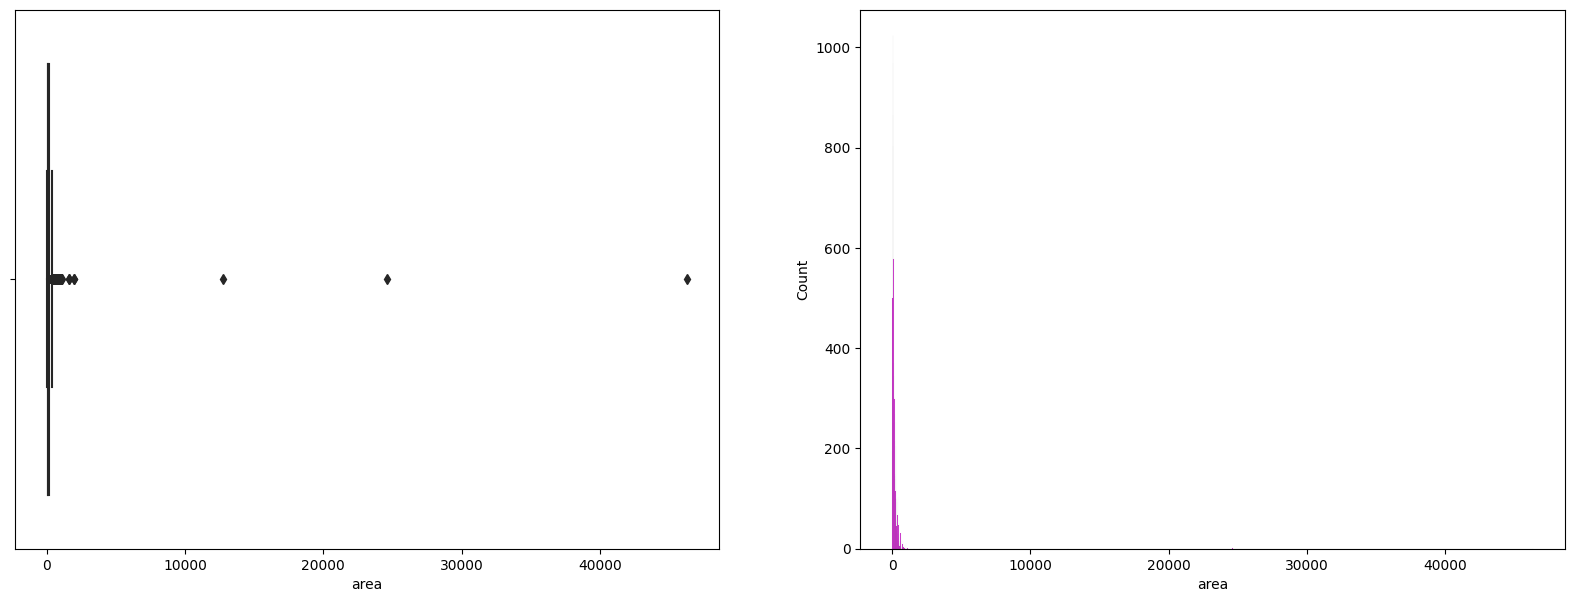

In [39]:
cont_dis_graph_w(df.area)

## As there is many outliers present in data calculating outliers by finding the range of upper fence and lower fence. 

In [37]:
df.describe()

area         rooms      bathroom  parking spaces         floor  \
count  10692.000000  10692.000000  10692.000000    10692.000000  10692.000000   
mean     149.217920      2.506079      2.236813        1.609147      5.067995   
std      537.016942      1.171266      1.407198        1.589521      6.069050   
min       11.000000      1.000000      1.000000        0.000000      0.000000   
25%       56.000000      2.000000      1.000000        0.000000      1.000000   
50%       90.000000      2.000000      2.000000        1.000000      3.000000   
75%      182.000000      3.000000      3.000000        2.000000      8.000000   
max    46335.000000     13.000000     10.000000       12.000000    301.000000   

           hoa (R$)  rent amount (R$)  property tax (R$)  fire insurance (R$)  \
count  1.069200e+04      10692.000000       10692.000000         10692.000000   
mean   1.174022e+03       3896.247194         366.704358            53.300879   
std    1.559231e+04       3408.545518        3107.832321            47.768031   
min    0.000000e+00        450.000000           0.000000             3.000000   
25%    1.700000e+02       1530.000000          38.000000            21.000000   
50%    5.600000e+02       2661.000000         125.000000            36.000000   
75%    1.237500e+03       5000.000000         375.000000            68.000000   
max    1.117000e+06      45000.000000      313700.000000           677.000000   

         total (R$)  
count  1.069200e+04  
mean   5.490487e+03  
std    1.648473e+04  
min    4.990000e+02  
25%    2.061750e+03  
50%    3.581500e+03  
75%    6.768000e+03  
max    1.120000e+06

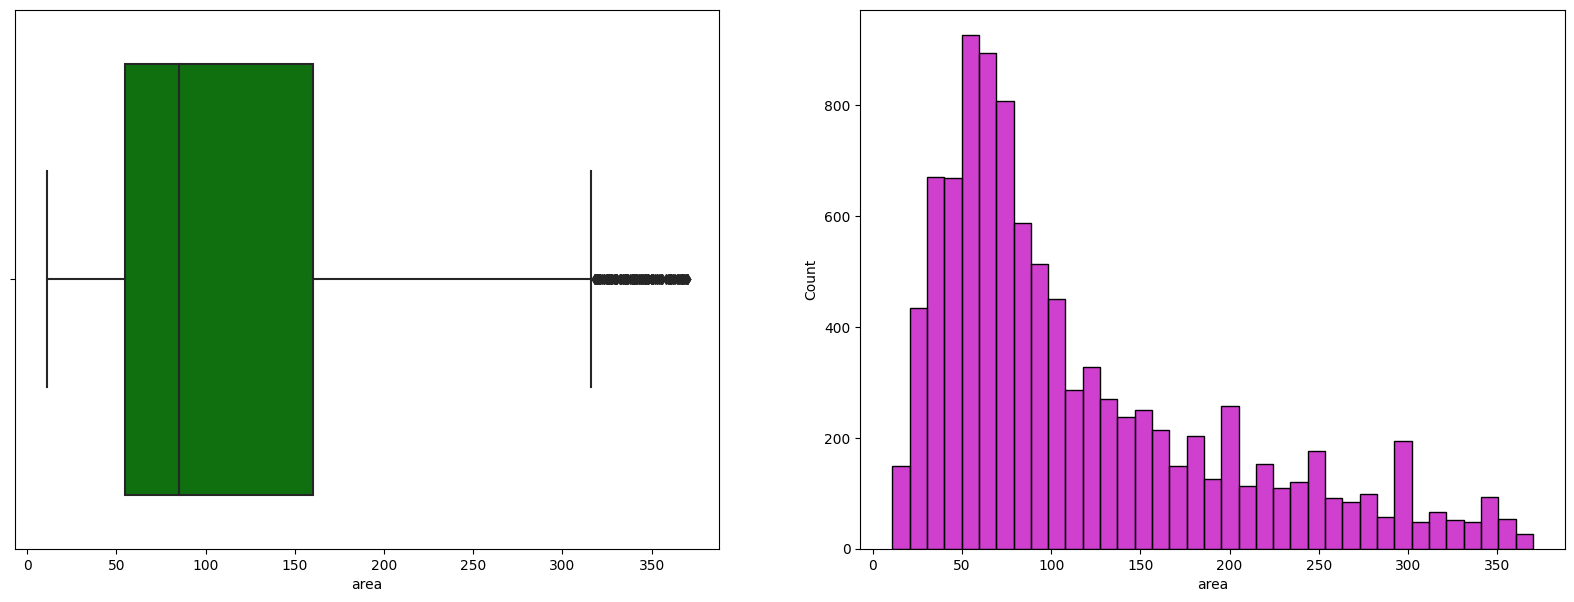

In [44]:
cont_dis_graph(df['area'],"area")

## *** Interpretation : 75% are having area less than approx. 160.
##                      Half of population having area 55 to 160 . 


## 

## Analysis of the hoa (R$) :

## As there is many outliers present in data calculating outliers by finding the range of upper fence and lower fence. 

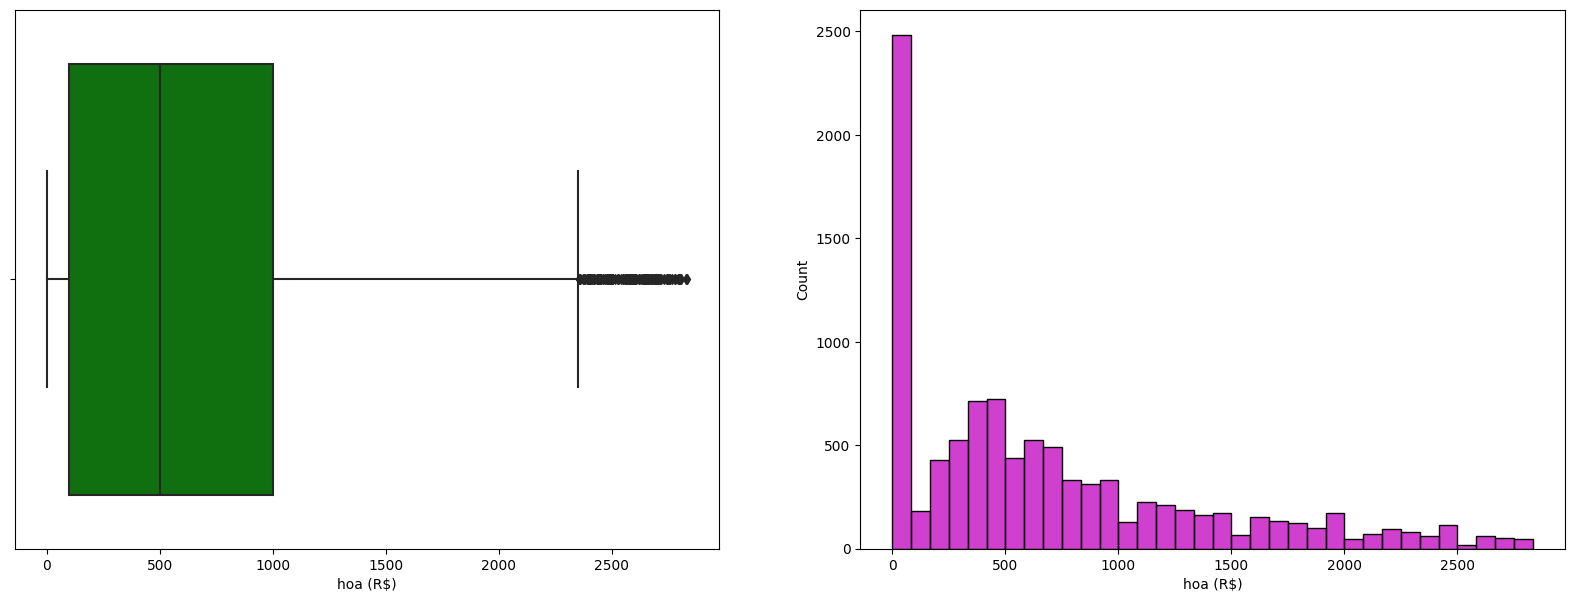

In [46]:
cont_dis_graph(df['hoa (R$)'],'hoa (R$)')


## ***Interpretation : 1. 3/4th of population having homeowner association tax less than 1000.0
##                     2. Half of population having homeowner association tax between 100 to 1000.
##                     3. Maximum homeowner association tax is 2835.                       

## *** Analysis of the rent amount (R$) :

## As there is many outliers present in data calculating outliers by finding the range of upper fence and lower fence. 

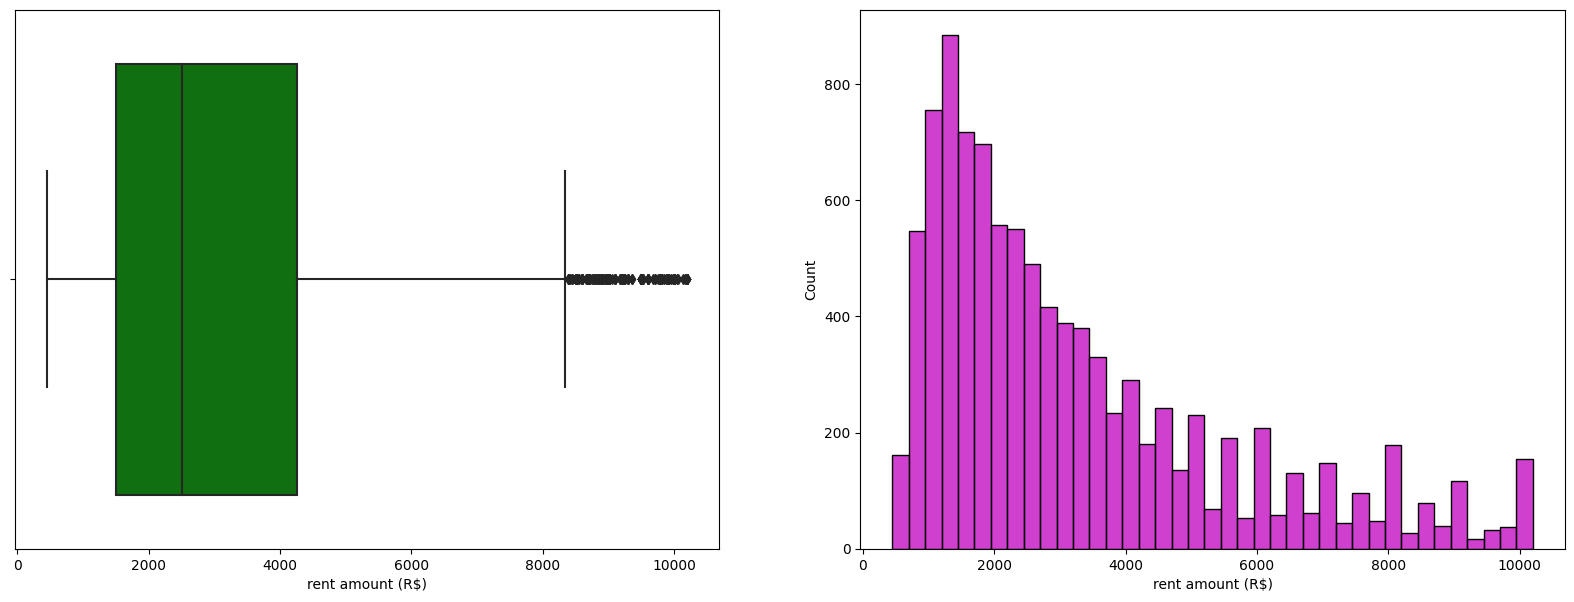

In [48]:
cont_dis_graph(df['rent amount (R$)'],'rent amount (R$)')

## ***Interpretation : 1. 3/4th of population having Rent amount of the property less than 4250.
##                     2. Half of population having Rent amount of the property between 1500 to 4250.
##                     3. Maximum Rent amount of the property after removing outliers is 10200.  

## *** Analysis of the rent Property Tax:

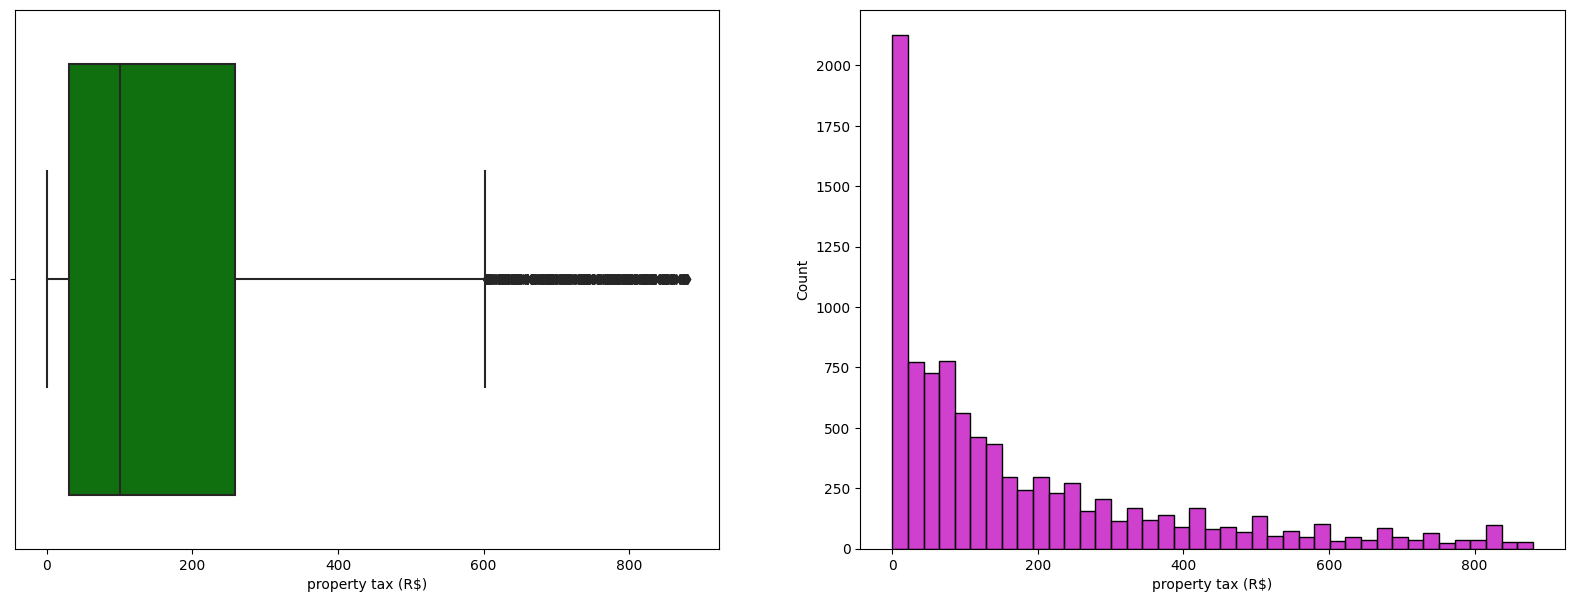

In [50]:
cont_dis_graph(df['property tax (R$)'],'property tax (R$)')

## ***Interpretation : 1. 3/4th of population having Tax on the property month-wise less than 259.
##                     2. Half of population having Tax on the property month-wise between 30 to 259.
##                     3. Maximum Tax on the property month-wise after removing outliers is 880.  

## *** Analysis of the fire insurance (R$) :

## As there is many outliers present in data calculating outliers by finding the range of upper fence and lower fence. 

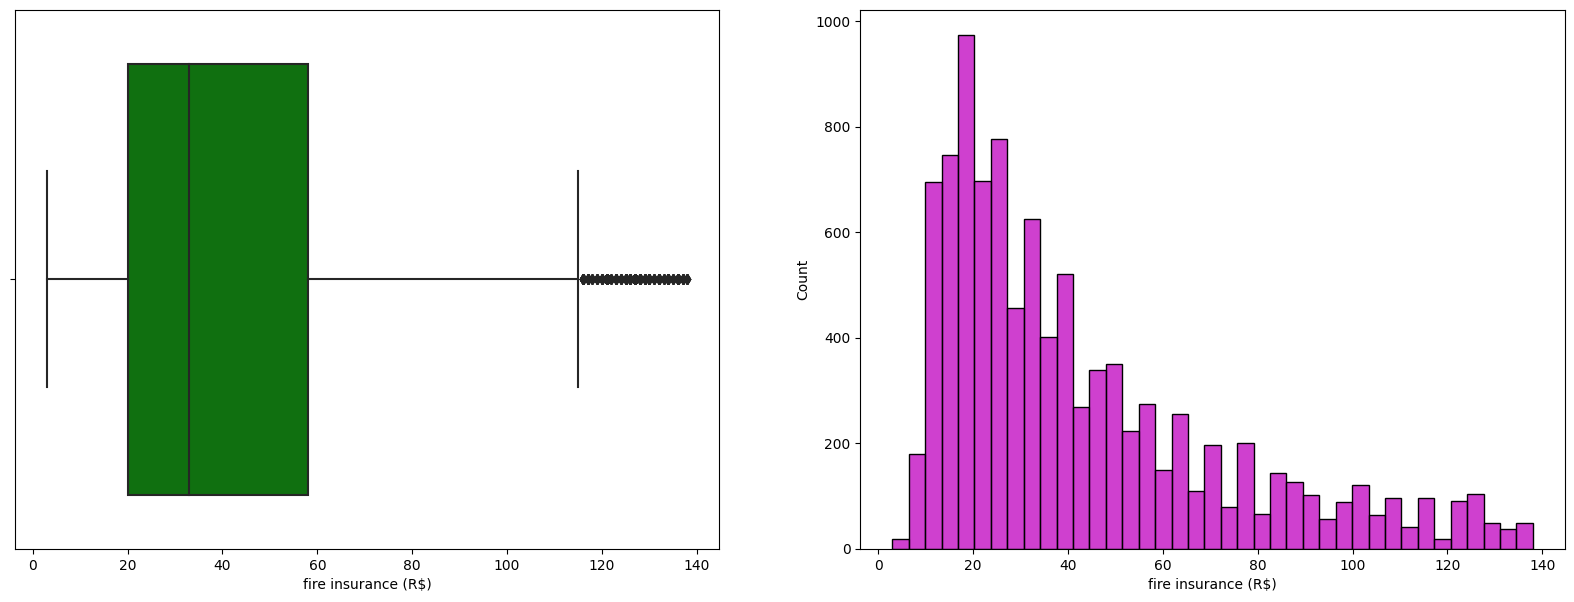

In [52]:
cont_dis_graph(df['fire insurance (R$)'],'fire insurance (R$)')

## ***Interpretation : 1. 3/4th of population having Cost of the fire insurance of the house less than 58.
##                     2. Half of population having Cost of the fire insurance of the house between 20 to 58.
##                     3. Maximum Cost of the fire insurance of the house after removing outliers is 138.  

## *** Analysis of the Total of rent amount, property tax, and fire insurance :

## As there is many outliers present in data calculating outliers by finding the range of upper fence and lower fence. 

In [53]:
cont_dis_graph1(df['total (R$)'],'total (R$)')

count     9986.000000
mean      4340.064791
std       3078.240405
min        499.000000
25%       1990.000000
50%       3330.000000
75%       5845.750000
max      13820.000000
Name: total (R$), dtype: float64

## ***Interpretation : 1. 3/4th of population having Total of rent amount, property tax, and fire insurance less than 5845.
##                     2. Half of population having Total of rent amount, property tax, and fire insurance between 1990 to 5845.
##                     3. Maximum Total of rent amount, property tax, and fire insurance after removing outliers is 13820.  

##

# 2nd Step: Categorical to Continuous

In [ ]:
categorical

['city', 'rooms', 'bathroom', 'parking spaces', 'floor', 'animal', 'furniture']

In [ ]:
continuous

['area',
 'hoa (R$)',
 'rent amount (R$)',
 'property tax (R$)',
 'fire insurance (R$)',
 'total (R$)']

In [ ]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [57]:
def Cat_cont_lvl2(cat_data,cont_data):
    for i in cat_data:
        for j in cont_data:
            upper_range=( df[j].quantile(0.75)+((df[j].quantile(0.75) -df[j].quantile(0.25)) * 1.5))
            lower_range=(df[j].quantile(0.25)-((df[j].quantile(0.75) -df[j].quantile(0.25)) * 1.5))
            z=df[(df[j]<upper_range) & (df[j]>lower_range)][j]
            fig = sns.boxplot(x = df[i] , y = z)
            plt.show()
            z=str(input('please give your interpretation'))
            print(f'*** Interpretation :\n {z}')
    return fig

In [ ]:
# def Cat_cont_lvl2(cat_data,cont_data):
#         for i in cat_data:
#             for j in cont_data:
#                 k,l=range_IQR(df[j])
#                 col_nam_22=df[(df[j]<k) & (df[j]>l)][j]
#                 fig = sns.boxplot(x = df[i] , y = col_nam_22)
#                 plt.show()
#                 z=str(input('please give your interpretation'))
#                 print(f'*** Interpretation :\n {z}')
#         return fig

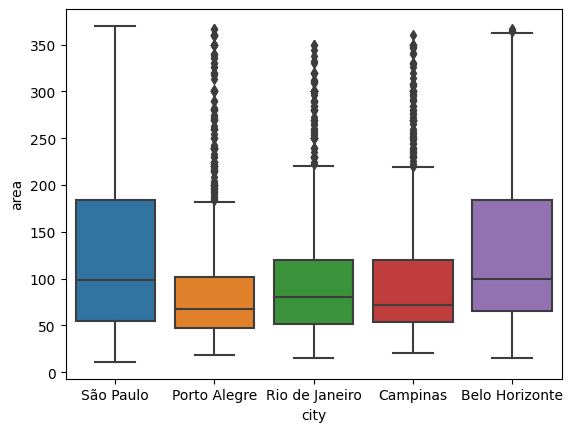

*** Interpretation :
 By comparing the area of all cities we found that population of Porto Alegre city are living in compact housing property compare to other cities.


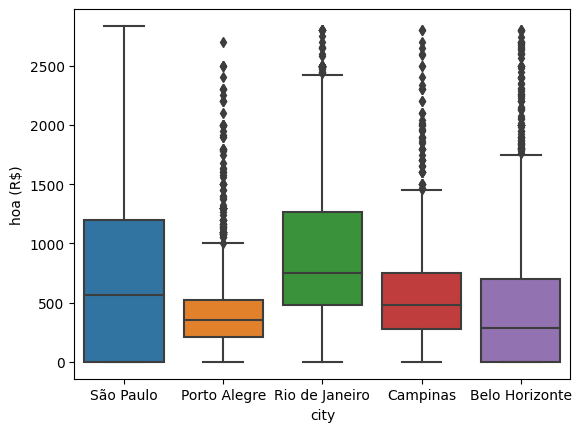

*** Interpretation :
 São Paulo city has the highest range for Homeowner association tax as compare to other cities.


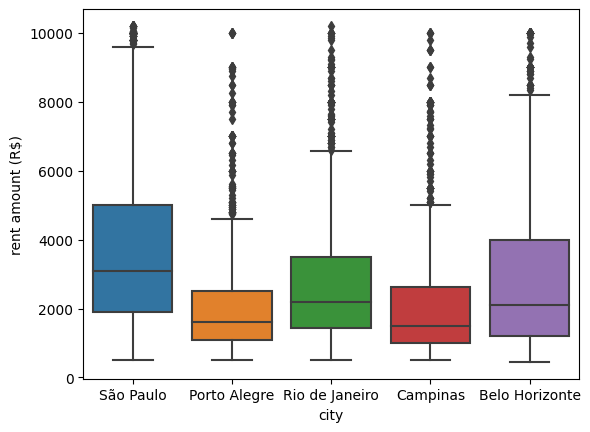

*** Interpretation :
 By comparing all box plots we can say that Porto Alegre followed by campinas has most economical rent property as compare to other cities.


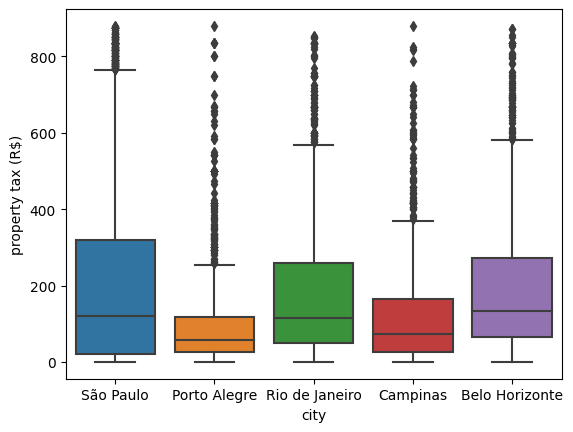

*** Interpretation :
 By comparing all box plots we can say that Porto Alegre has most affordable property tax as compare to other cities.


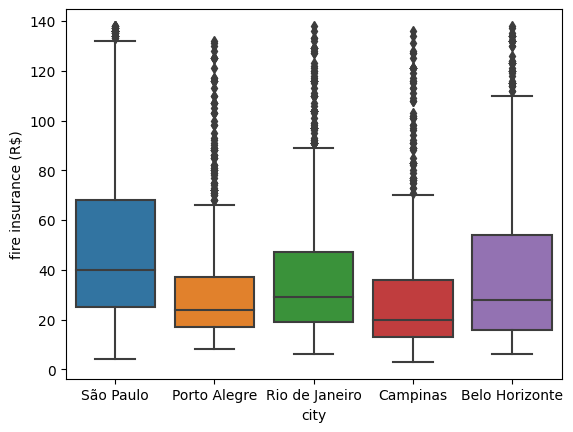

*** Interpretation :
 By comparing all box plots we can say that Porto Alegre has most affordable fire insurance amount as compare to other cities.


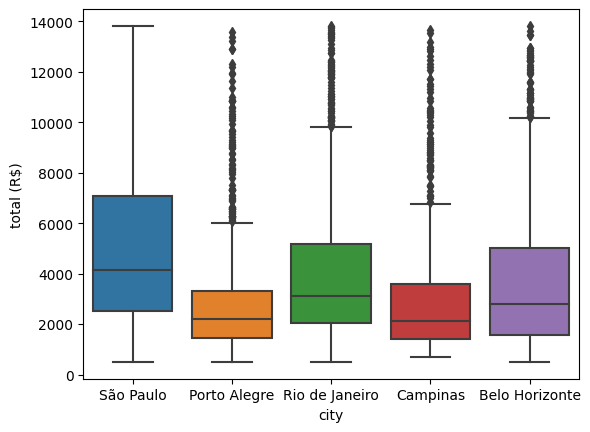

*** Interpretation :
 By comparing all box plots we can say that Porto Alegre has most affordable total of rent amount, property tax, and fire insurance as compare to other cities where as campinas is second most affordable city .


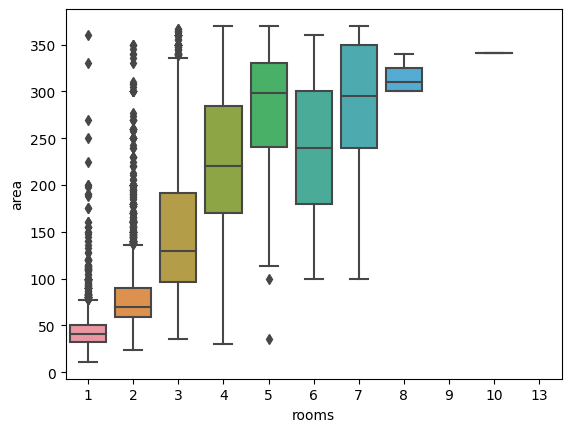

*** Interpretation :
 Area is gradually increasing with respect to count of rooms.


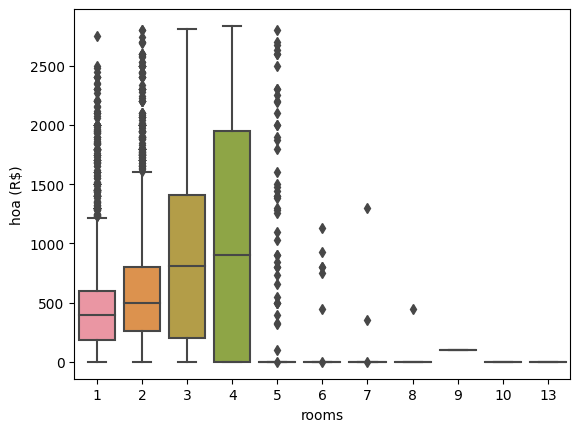

*** Interpretation :
 Hoa is gradually increasing upto the count of rooms 4 but no such interpretation can be given after rooms 4.


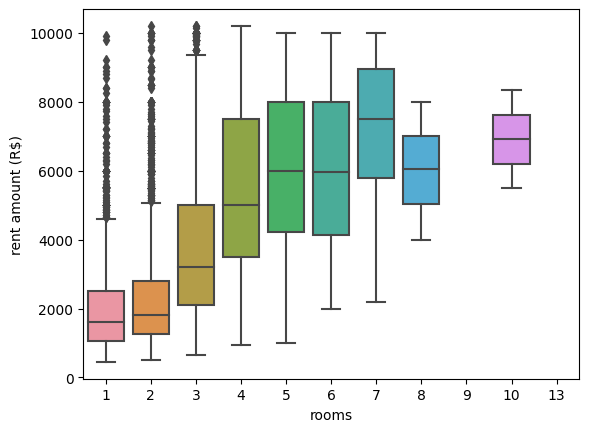

*** Interpretation :
 Rent amount is gradually increasing upto rooms 7 but no such interpretation can be given after rooms 7.


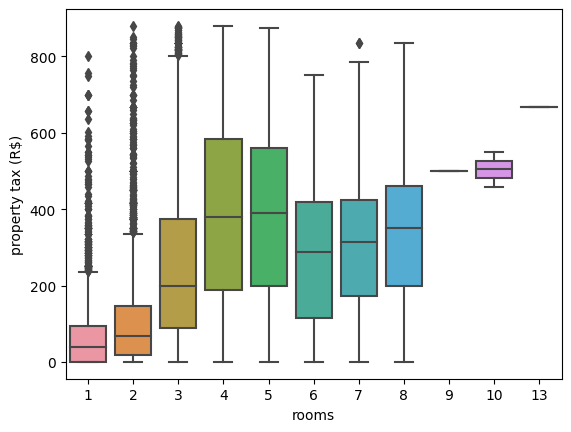

*** Interpretation :
 Property tax is gradually increasing upto count rooms 5 but no such interpretation can be given after rooms 5.


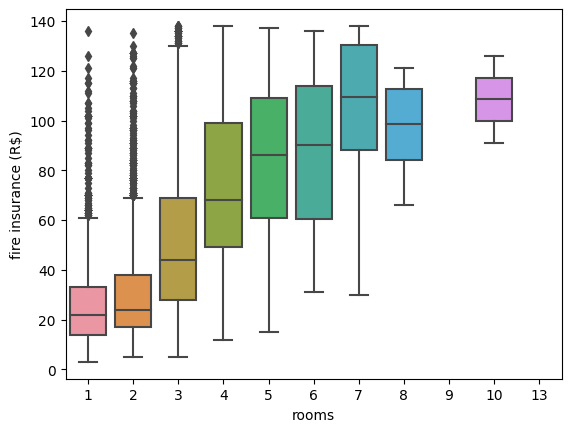

*** Interpretation :
 Fire insurance is gradually increasing upto count rooms 7 but no such interpretation can be given after rooms 7


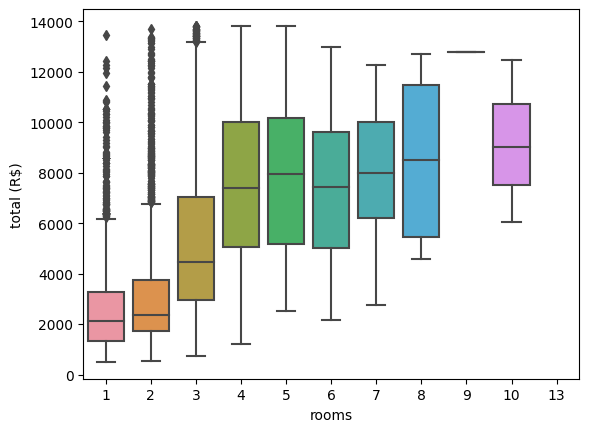

*** Interpretation :
 Total is gradually increasing upto count rooms 7 but no such interpretation can be given for room count 9 .


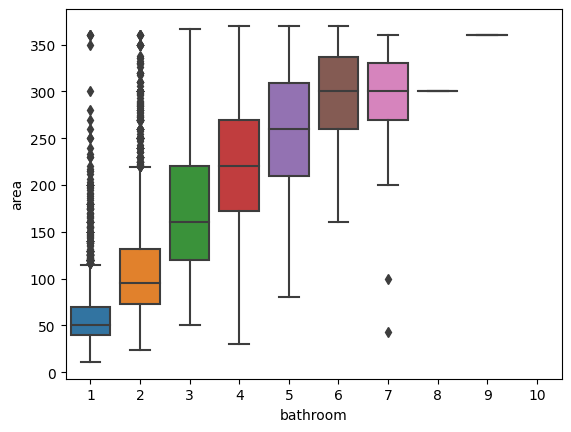

*** Interpretation :
 Area is gradually increasing upto count of bathrooms.


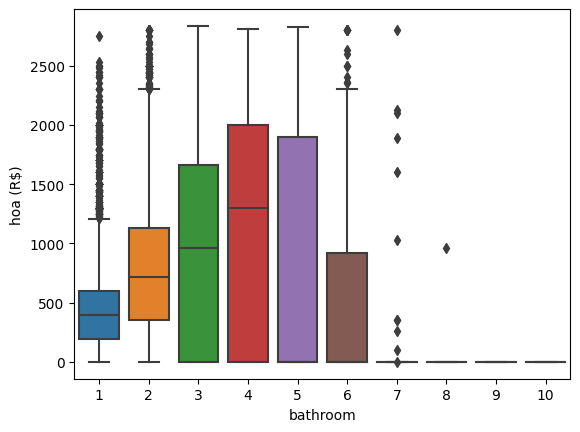

*** Interpretation :
 There is no such conclusion we can provide by comparing this data .


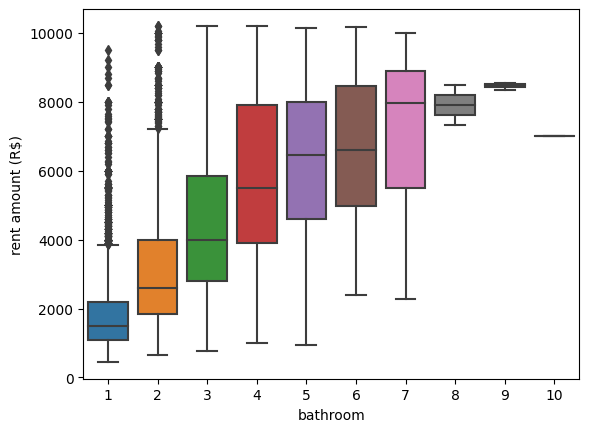

*** Interpretation :
 Rent amount is gradually increasing upto count bathroom .


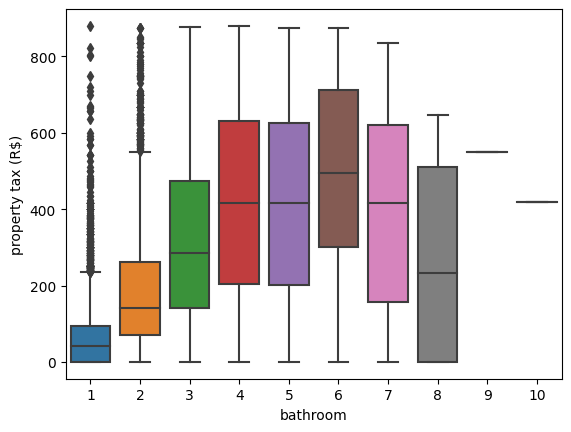

*** Interpretation :
 Property tax is gradually increasing upto count of bathroom 6 but cannot be given after count of bathroom6.


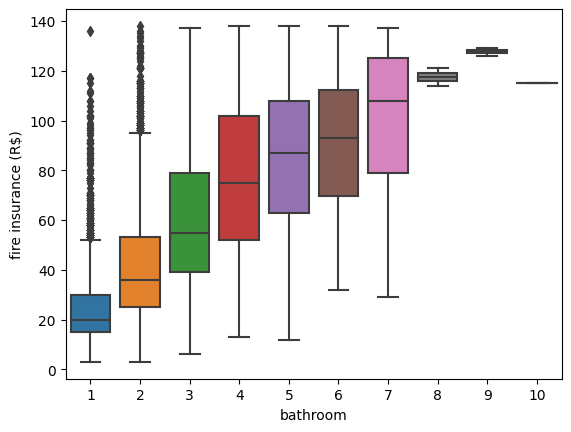

*** Interpretation :
 Fire insurance is gradually increasing upto count bathroom.


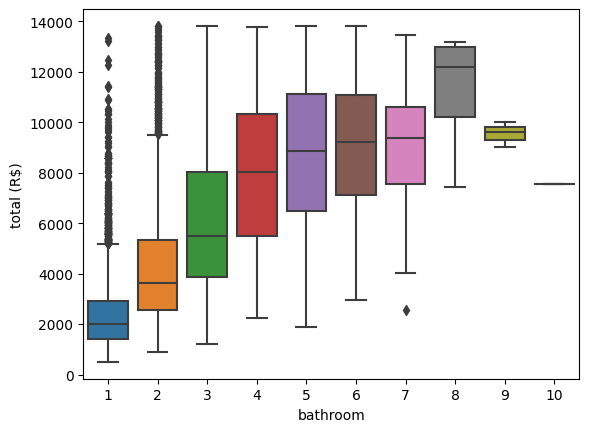

*** Interpretation :
 Total is gradually increasing upto count of bathrooms.


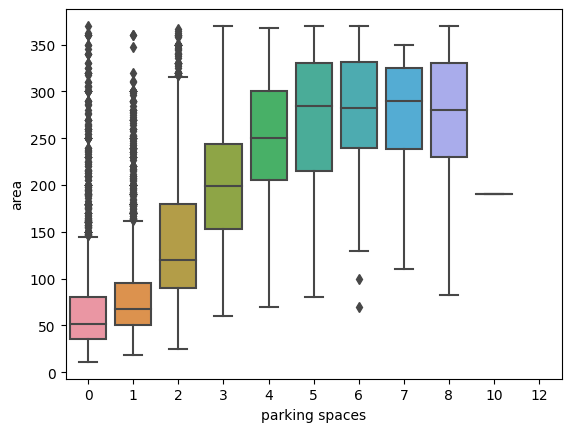

*** Interpretation :
 Area is gradually increasing upto count of 5 parking spaces but no such interpretation can be given after 5 parking spaces.


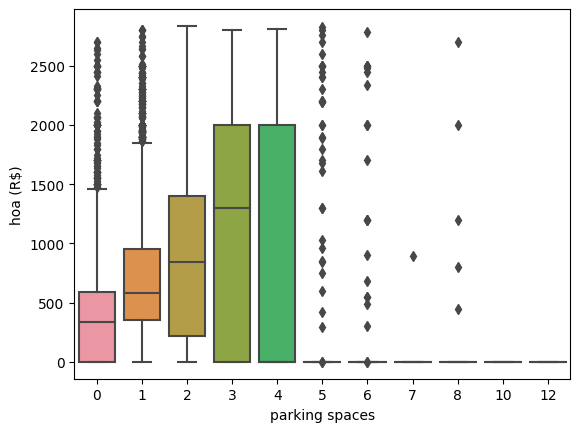

*** Interpretation :
 HOA is gradually increasing upto count of 3 parking spaces but no such interpretation can be given after count of 3 parking spaces.


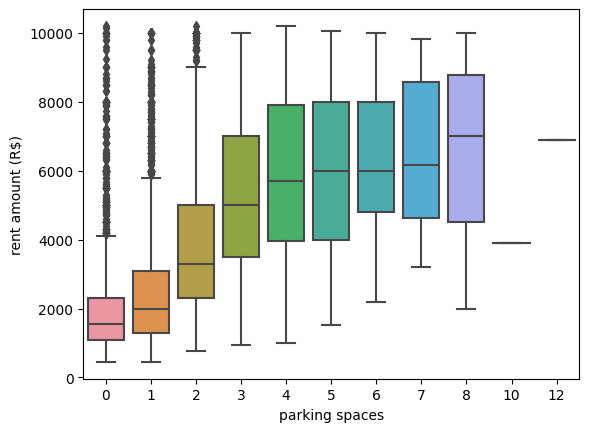

*** Interpretation :
 Rent amount is gradually increasing upto count of parking spaces.


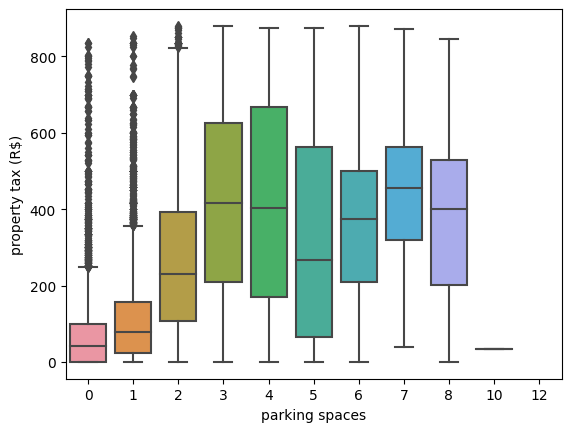

*** Interpretation :
 Property tax is gradually increasing upto 4 parking spaces but no such interpretation can be given after 4 parking spaces


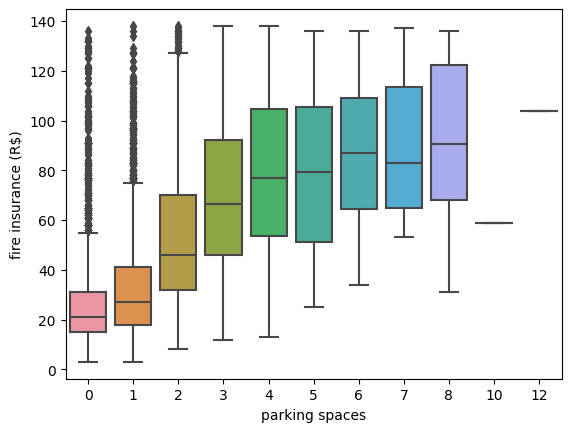

*** Interpretation :
 Fire insurance is gradually increasing upto count of parking spaces.


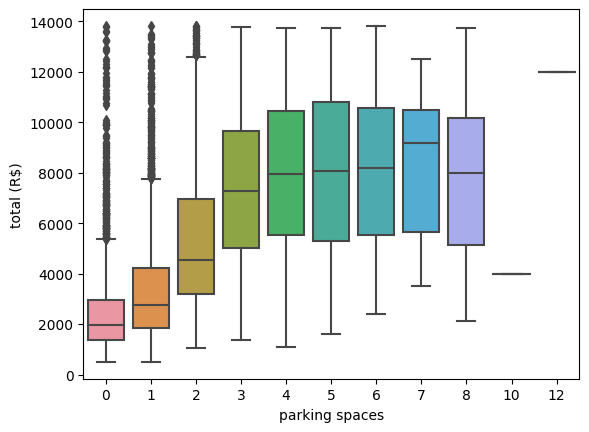

*** Interpretation :
 Total is gradually increasing upto count of 7 parking spaces but no such interpretation can be given after count of 7 parking spaces


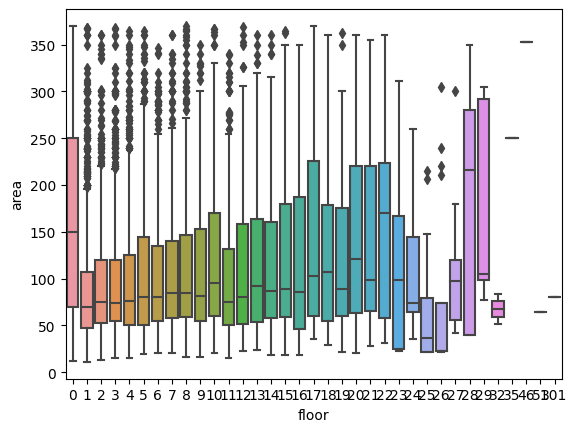

*** Interpretation :
 There is no such interpretation can be given with this plot.


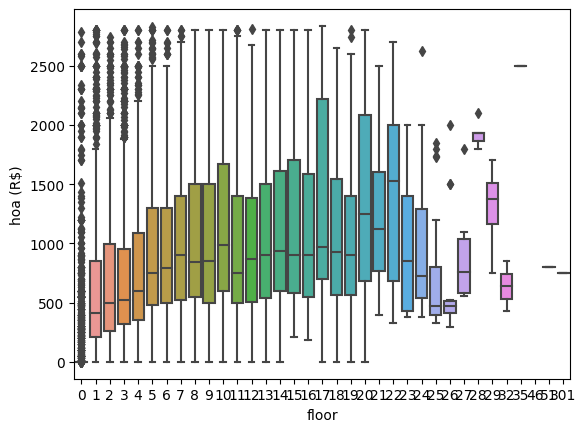

*** Interpretation :
 There is no such interpretation can be given with this plot.


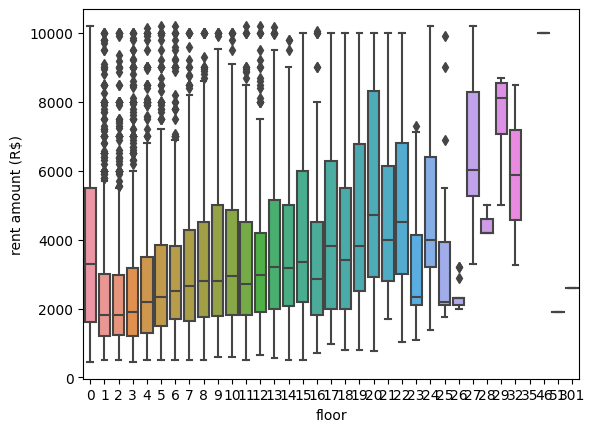

*** Interpretation :
 There is no such conclusion we can provide by comparing this data .


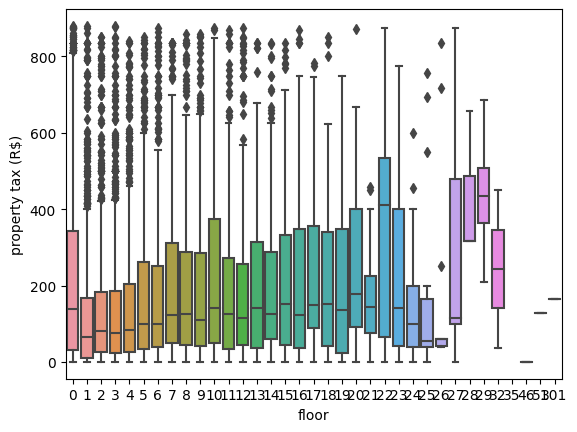

*** Interpretation :
 There is no such conclusion we can provide by comparing this data .


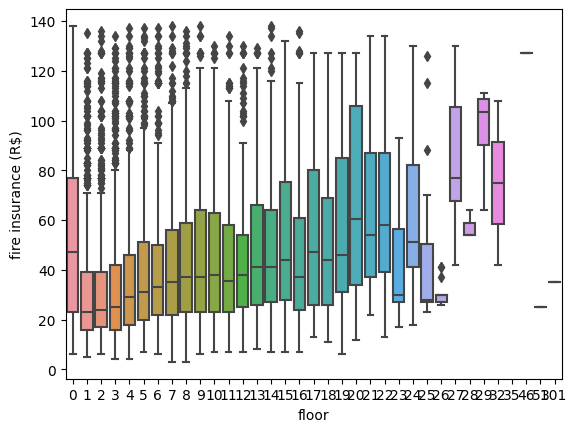

*** Interpretation :
 There is no such conclusion we can provide by comparing this data .


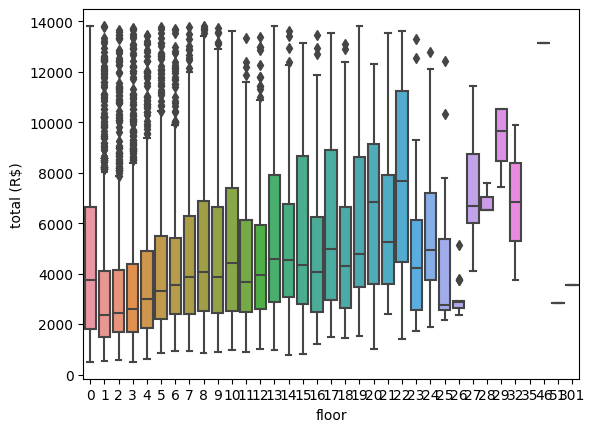

*** Interpretation :
 There is no such conclusion we can provide by comparing this data .


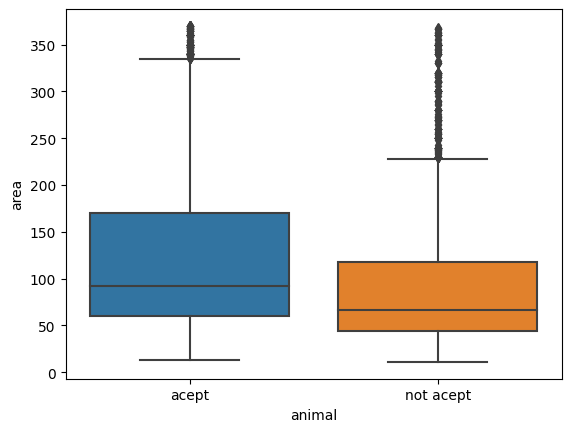

*** Interpretation :
 There is no such conclusion we can provide by comparing this data .


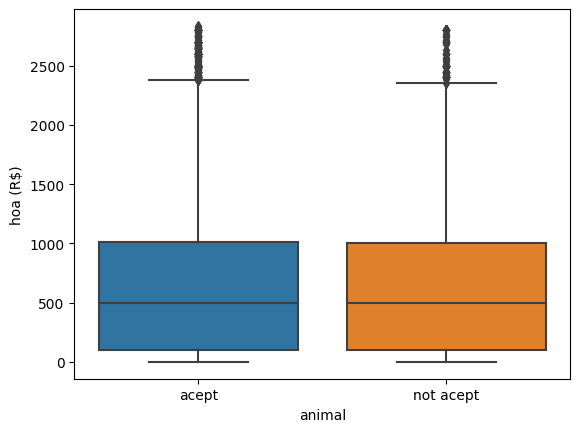

*** Interpretation :
 There is no such conclusion we can provide by comparing this data .


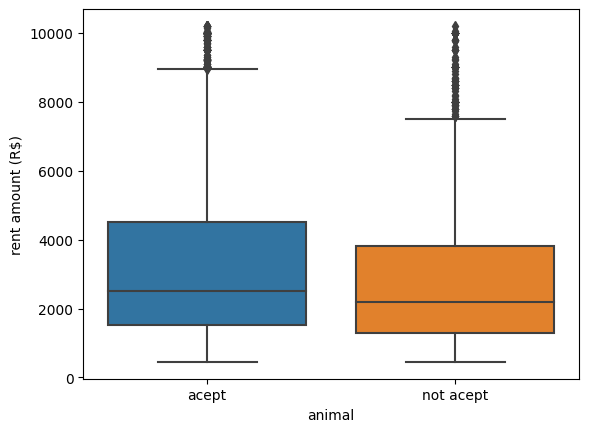

*** Interpretation :
 There is no such conclusion we can provide by comparing this data .


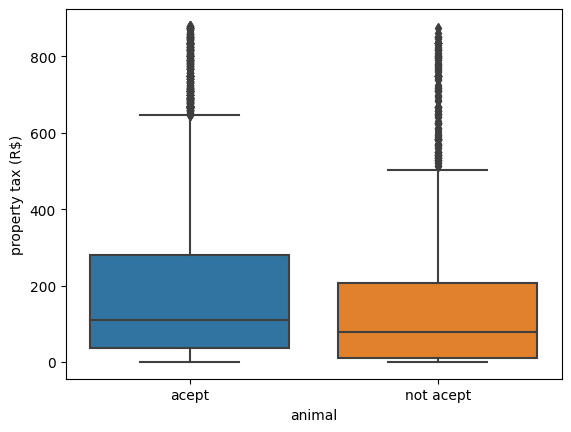

*** Interpretation :
 There is no such conclusion we can provide by comparing this data .


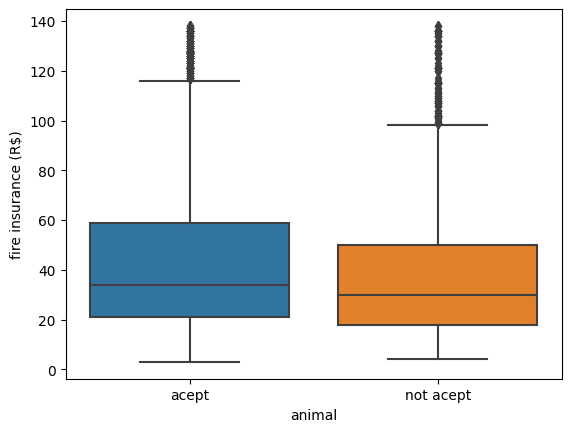

*** Interpretation :
 There is no such conclusion we can provide by comparing this data .


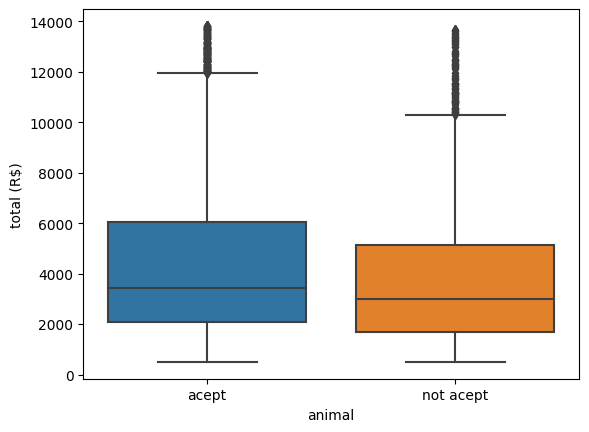

*** Interpretation :
 There is no such conclusion we can provide by comparing this data .


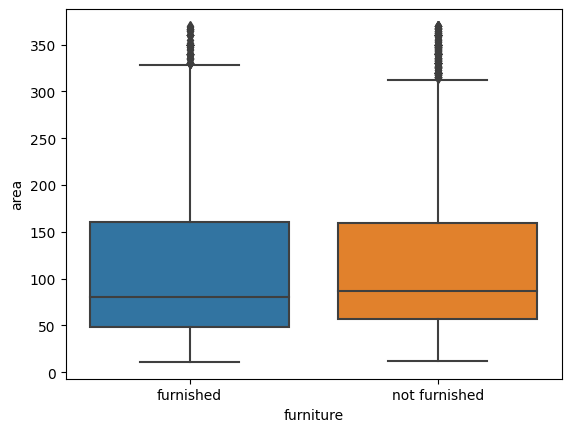

*** Interpretation :
 There is no such conclusion we can provide by comparing this data .


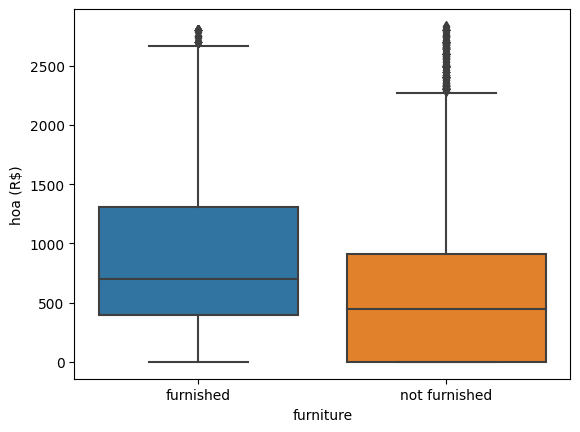

*** Interpretation :
 HOA is slightly more than in furnished as compared to not furnished 


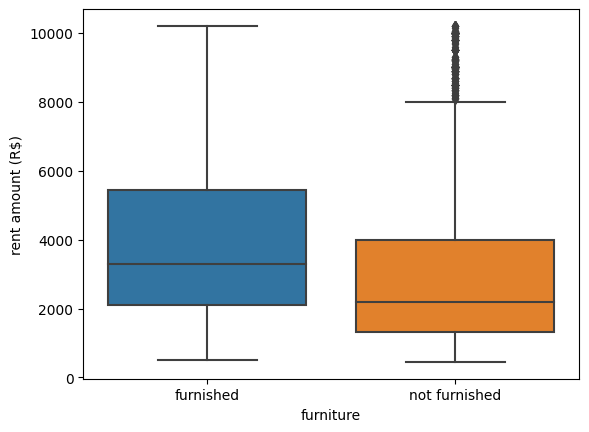

*** Interpretation :
 rent amount is more in furnished as compared to not furnished 


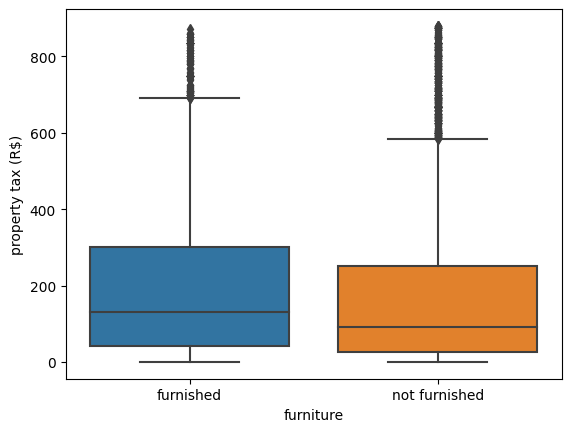

*** Interpretation :
 There is no such conclusion we can provide by comparing this data .


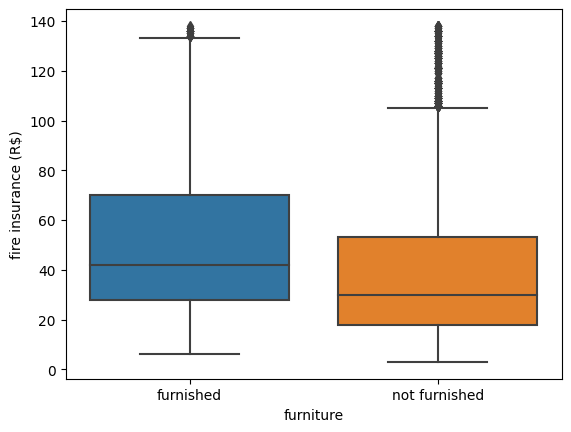

*** Interpretation :
 Slight increase in fire insurance for furnished houses as compare to not furnished .


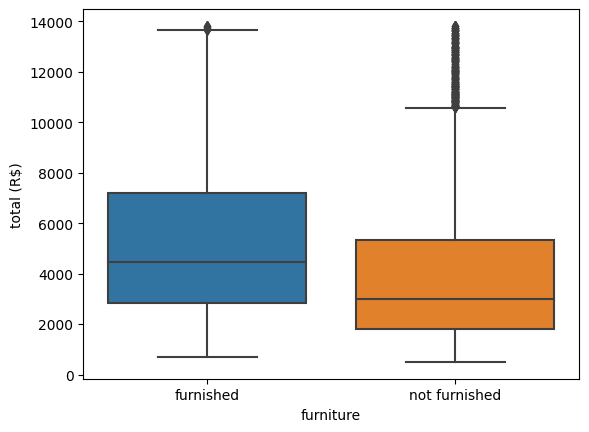

*** Interpretation :
 Increase in total for furnished houses as compare to not furnished .


<AxesSubplot:xlabel='furniture', ylabel='total (R$)'>

In [58]:
Cat_cont_lvl2(categorical,continuous)

In [60]:
import scipy.stats 

In [61]:
null = "There is no significant difference in total price those who accept animal or who don't."
alt_hyp = "There is a significant difference in total price where animal are allowed or not allowed "
alpha = 0.05
stas, p_value, median, table = scipy.stats.median_test(df[df['animal']=='acept']['total (R$)'],df[df['animal']=='not acept']['total (R$)'])
if p_value < alpha:
    print(alt_hyp)
else:
    print(null)

There is a significant difference in total price where animal are allowed or not allowed 


In [62]:
null = "There is no significant difference in total price according to number of bathrooms."
alt_hyp = "There is a significant difference in total price according to number of bathrooms. "
alpha = 0.05
stas, p_value, median, table = scipy.stats.median_test(df[df['bathroom']==1]['total (R$)'],df[df['bathroom']==2]['total (R$)'],df[df['bathroom']==3]['total (R$)'],df[df['bathroom']==4]['total (R$)'],df[df['bathroom']==5]['total (R$)'],df[df['bathroom']==6]['total (R$)'],df[df['bathroom']==7]['total (R$)'],df[df['bathroom']==8]['total (R$)'],df[df['bathroom']==9]['total (R$)'],df[df['bathroom']==10]['total (R$)'])
if p_value < alpha:
    print(alt_hyp)
else:
    print(null)

There is a significant difference in total price according to number of bathrooms. 


In [ ]:
df['floor'].unique()

array([  7,  20,   6,   2,   1,   0,   4,   3,  10,  11,  24,   9,   8,
        17,  18,   5,  13,  15,  16,  14,  26,  12,  21,  19,  22,  27,
        23,  35,  25,  46,  28,  29, 301,  51,  32], dtype=int64)

In [63]:
null = "There is no significant difference in total price according to number of floors."
alt_hyp = "There is a significant difference in total price according to number of floors. "
alpha = 0.05
z=[]
for i in df['floor'].unique():
    z.append(df[df['floor']==i]['total (R$)'])
stas, p_value, median, table = scipy.stats.median_test(z[0],z[1],z[2],z[3],z[4],z[5],z[6],z[7],z[8],z[9],z[10],z[11],z[12],z[13],z[14],z[15],z[16],z[17],z[18],z[19],z[20],z[21],z[22],z[23],z[24],z[25],z[26],z[27],z[28],z[29],z[30],z[31],z[32],z[33],z[34])
if p_value < alpha:
    print(alt_hyp)
else:
    print(null)

There is a significant difference in total price according to number of floors. 


In [ ]:
df['furniture'].unique()

array(['furnished', 'not furnished'], dtype=object)

In [64]:
null = "There is no significant difference in total price those who have furnished or not furnished house property."
alt_hyp = "There is a significant difference in total price those who have furnished or not furnished house property."
alpha = 0.05
stas, p_value, median, table = scipy.stats.median_test(df[df['furniture']=='furnished']['total (R$)'],df[df['furniture']=='not furnished']['total (R$)'])
if p_value < alpha:
    print(alt_hyp)
else:
    print(null)

There is a significant difference in total price those who have furnished or not furnished house property.


## After performing Median test on different columns we get to know that there is a significant difference between categorical and numerical columns hence we can consider these columns for further analysis.

# Level 3 Further Analysis 

In [ ]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [ ]:
o_a=df[(df['total (R$)']<10443.375) & (df['total (R$)']>3092.625)]

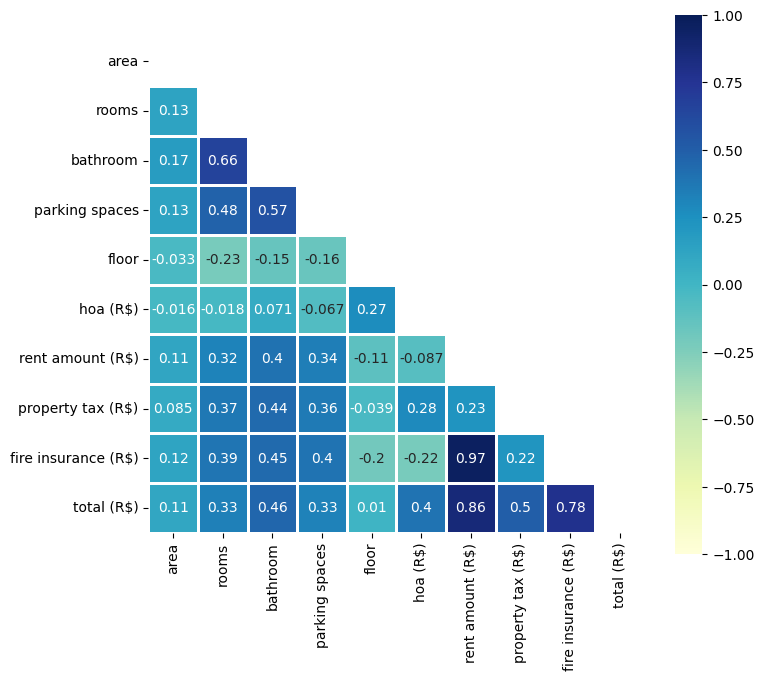

In [ ]:
plt.figure(figsize=(8, 7))
sns.heatmap(o_a.corr(), cmap="YlGnBu", center=0, annot=True,vmin=-1, vmax=1,linewidth=1, linecolor='w', square=True,mask= np.triu(o_a.corr()))
plt.show()

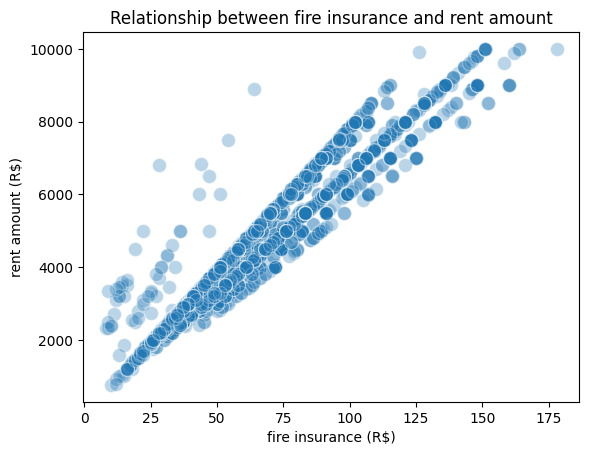

In [ ]:

sns.scatterplot(x ='fire insurance (R$)', y = 'rent amount (R$)', data = o_a, s = 100, alpha = 0.3, edgecolor = 'white')
plt.title('Relationship between fire insurance and rent amount')
plt.show()

#### By the data dictionary we knew that Total consist of all three parameters 'Rent amount', 'Fire insurance' and 'property tax'.
#### From above plots we can conclude that there is significant relationship between rooms, bathrooms and parking spaces.
##  *** Hence we are exploring relationship between 'rooms', 'bathroom', 'parking spaces' and 'Total'.

In [ ]:
df['city'].unique()

array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

In [ ]:
x=3093
z=[3093,1469,1469,1469,1469,1469]
y=[]
v=[]
for i in z:
    y.append(i)
    w=sum(y)

In [ ]:
(10440-3093)/5

1469.4

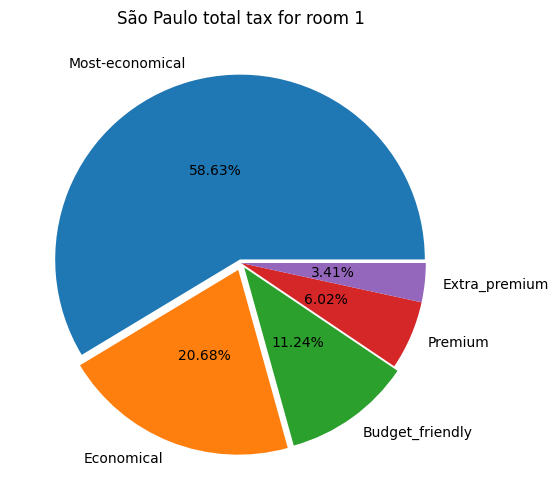

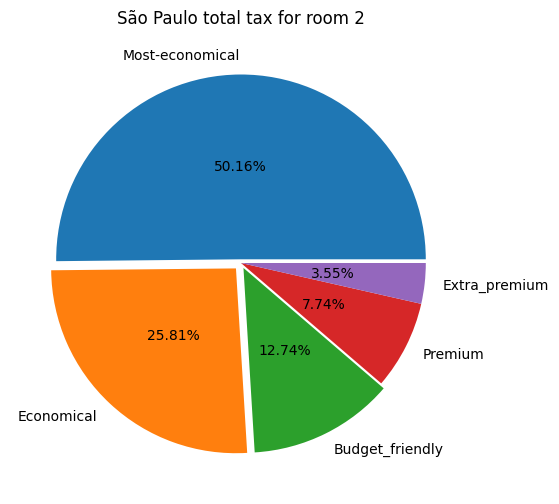

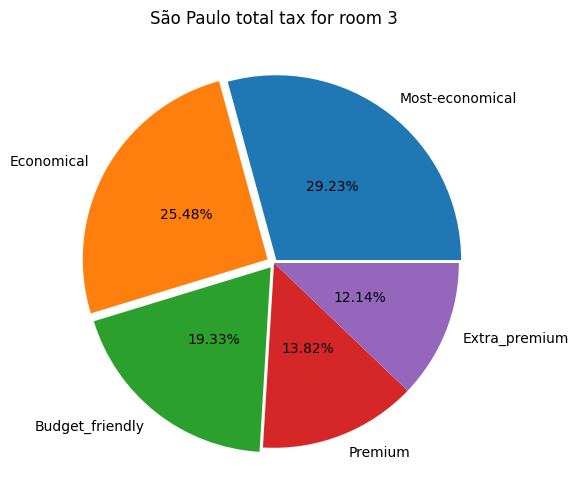

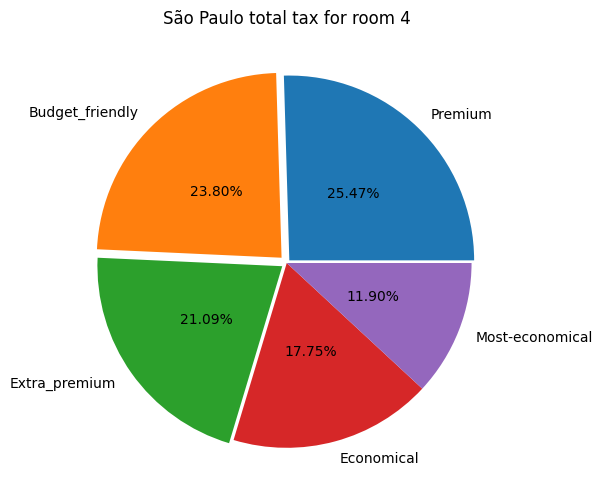

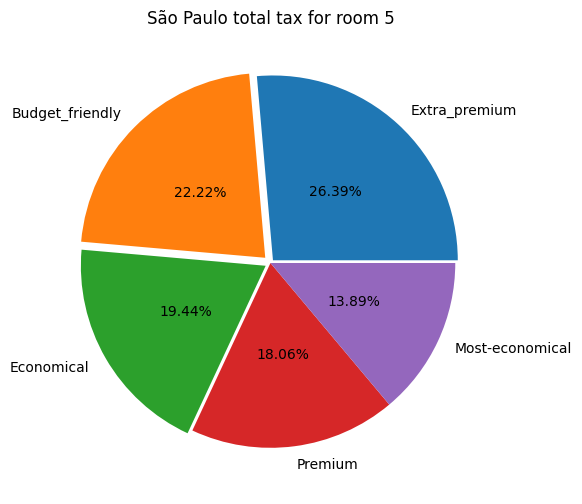

*** Interpretation:As per above plot we can interpret that In Sao paulo city, house property having rooms upto 3 falling under Most- economical or economical category for total taxes.


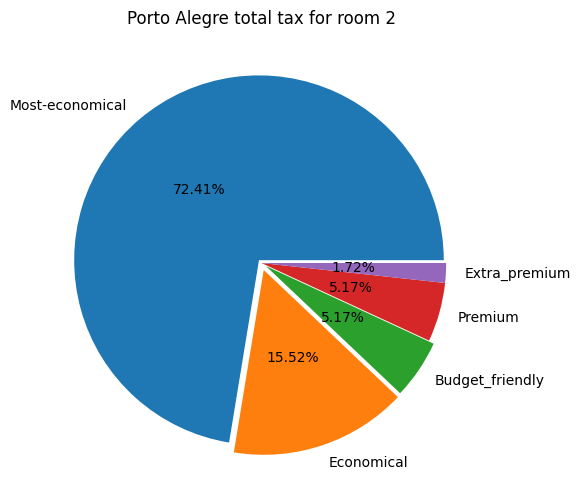

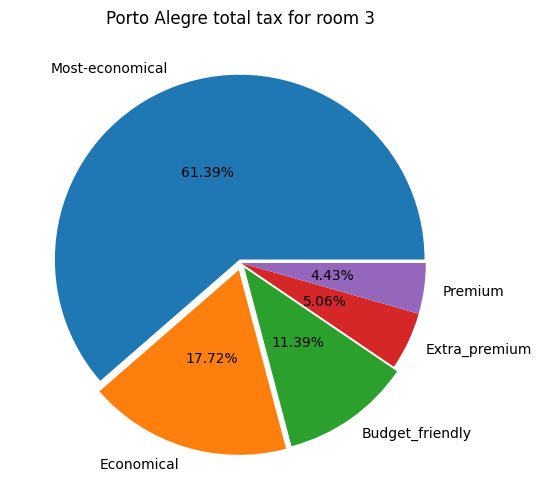

*** Interpretation:As per above plot we can interpret that In Porto Alegre city, house property having room2 and room3 falling under Most- economical or economical category for total taxes.


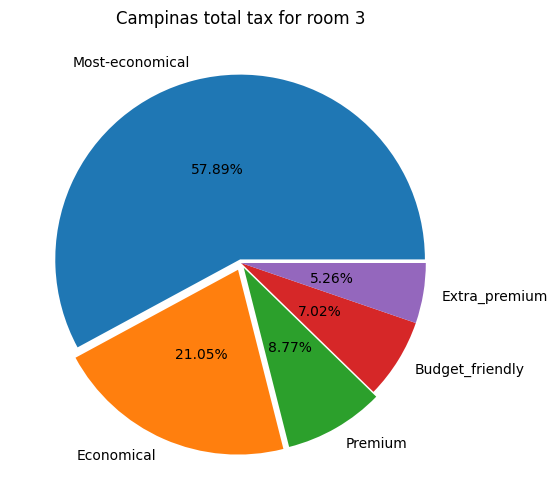

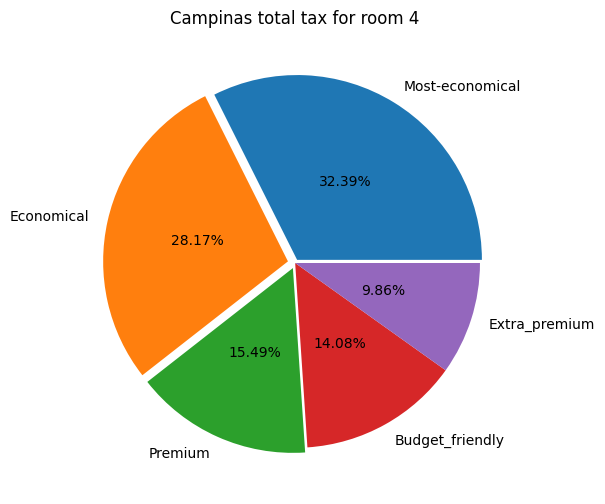

*** Interpretation:As per above plot we can interpret that In Campinas city, house property having room3 and room4 falling under Most- economical or economical category for total taxes.


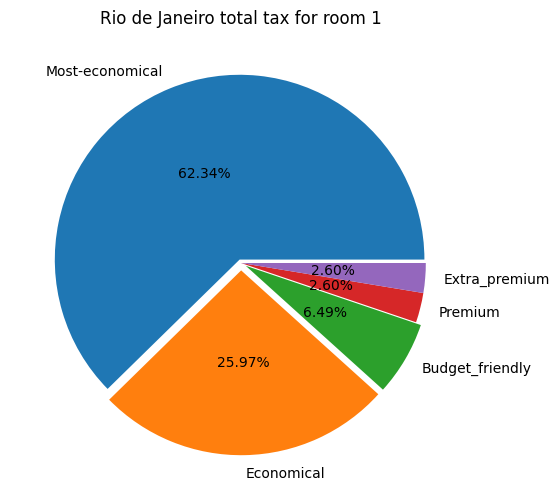

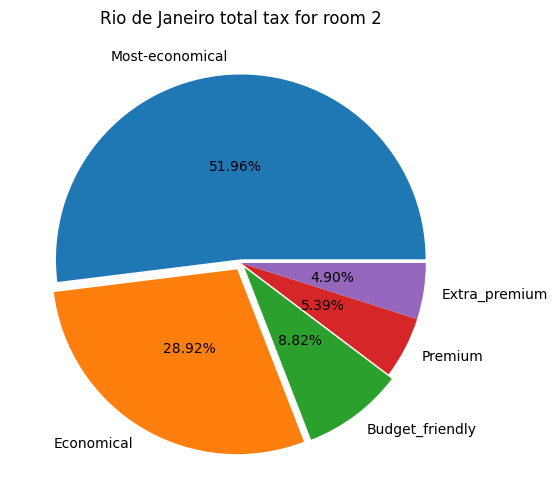

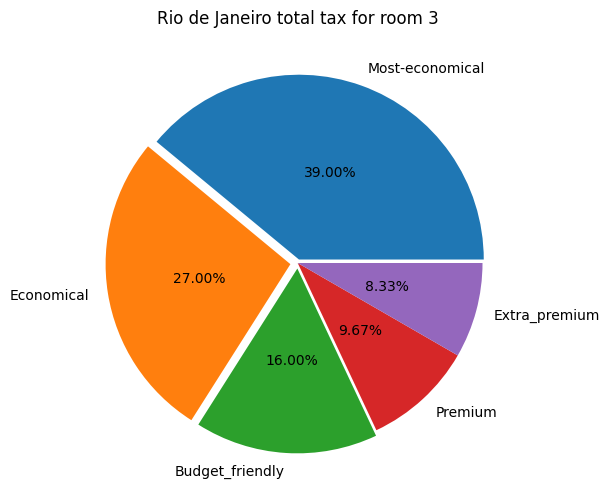

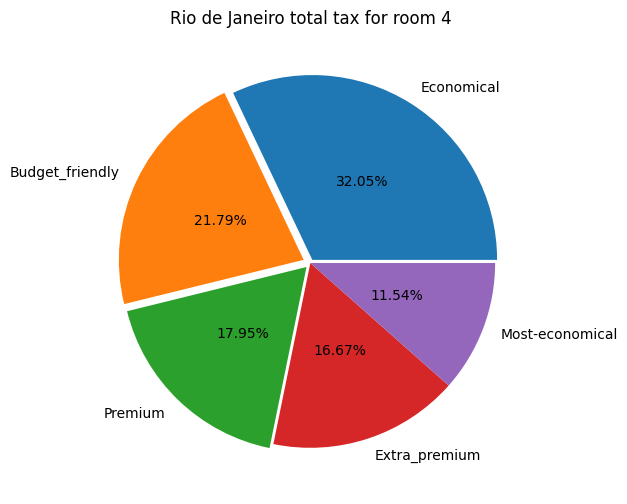

*** Interpretation:As per above plot we can interpret that In Rio de Janeiro city, house property having rooms upto 4 falling under Most- economical or economical category for total taxes.


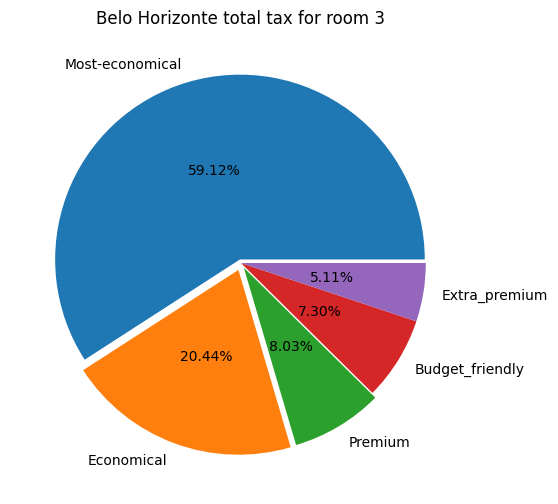

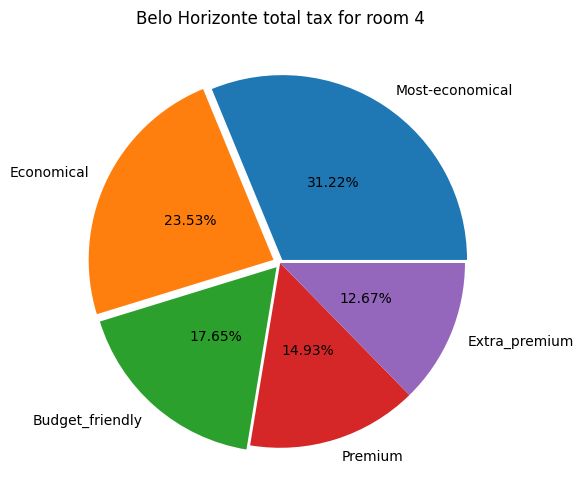

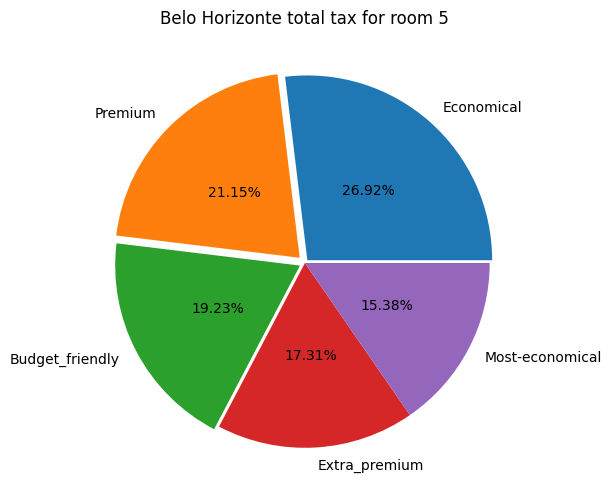

*** Interpretation:As per above plot we can interpret that In Belo Horizonte city, house property having room 3, 4 & 5 falling under Most- economical or economical category for total taxes.


 *** Final Interpretation:

1.As per above plot we can interpret that In Sao paulo city, house property having rooms upto 3 falling under Most- economical or economical category for total taxes.
2.As per above plot we can interpret that In Porto Alegre city, house property having room2 and room3 falling under Most- economical or economical category for total taxes.
3.As per above plot we can interpret that In Campinas city, house property having room3 and room4 falling under Most- economical or economical category for total taxes.
4.As per above plot we can interpret that In Rio de Janeiro city, house property having rooms upto 4 falling under Most- economical or economical category for total taxes.
5.As per above plot we can interpret that In Belo Horizonte city, house property having room 3, 4 &

In [ ]:
Inter=[]
for j in o_a['city'].unique():
    for i in sorted(o_a[o_a["city"]==j]['rooms'].unique()):
        if len(o_a[(o_a["city"]==j) & (o_a["rooms"]==i)])>50 :
            tax_cat = o_a[(o_a["city"]==j) & (o_a["rooms"]==i)]
            bins = [3093,4562,6031,7500,8969,10438]                                         
            labels = ["Most-economical", "Economical", "Budget_friendly", "Premium", "Extra_premium"]
            data = pd.cut(tax_cat["total (R$)"], bins = bins, labels = labels)
            data = data.value_counts()                        
            pie, ax = plt.subplots(figsize = [10,6])
            plt.pie(x = data,explode = [0.02, 0.04, 0.03, 0,0] ,labels =data.index,autopct='%.2f%%', pctdistance = 0.5)
            plt.title(f"{j} total tax for room {i}")
            plt.show()
        else:
            pass
    y=input('Provide your interpretation:')
    print(f'*** Interpretation:{y}')
    Inter.append(y)
print(f'\n\n *** Final Interpretation:\n')
for i,j in zip(Inter,range(1,6)):
    print(f'{j}.{i}')

## *** From final Interpretation it is determined that 'BELO HORIZONTE CITY' falls under most economical or economical category based on no. of rooms.

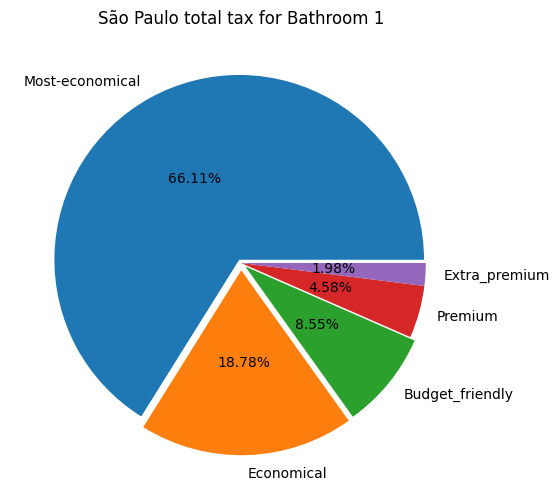

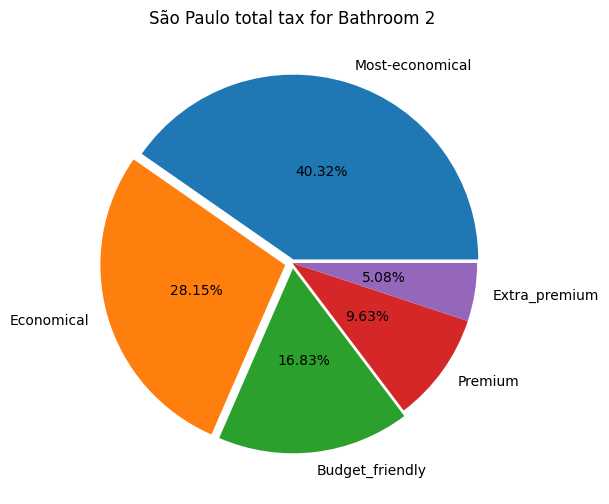

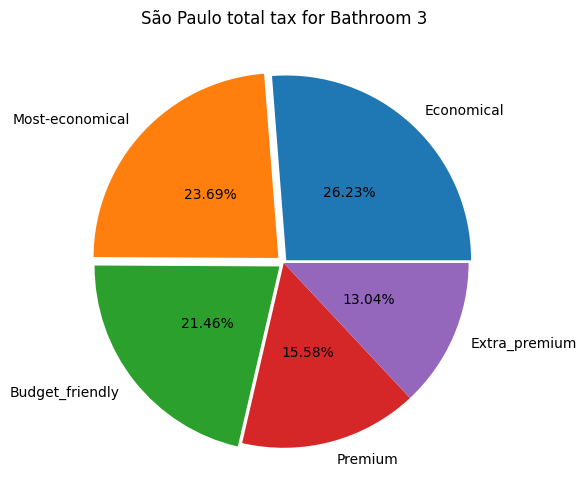

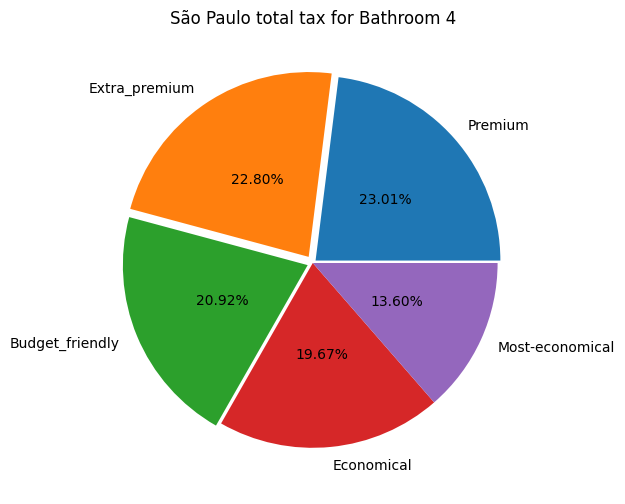

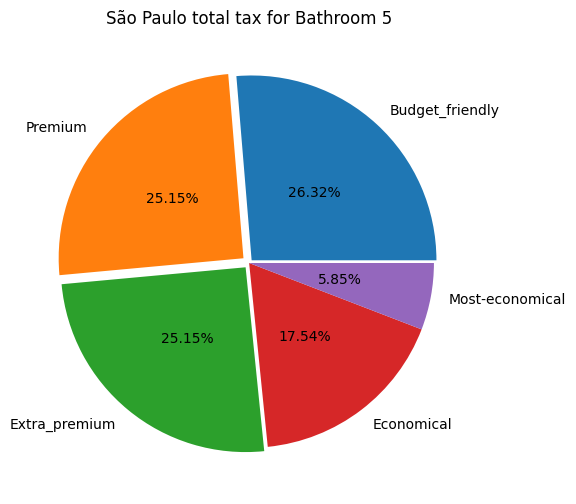

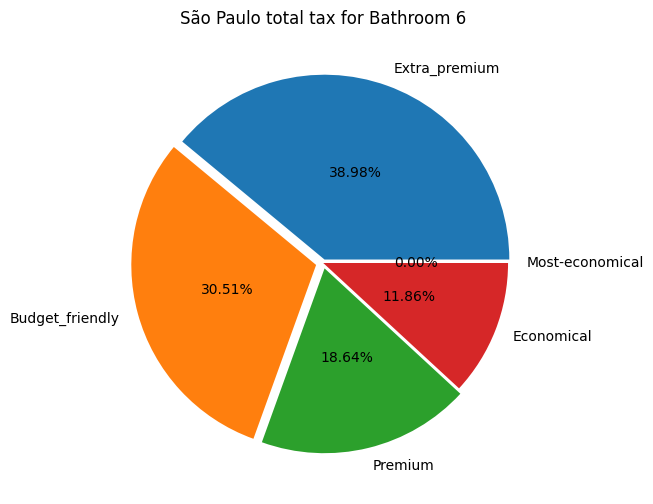

*** Interpretation:As per above plot we can interpret that In Sao Paulo, house property having bathroom upto 3 falling under Most- economical or economical category for total taxes.


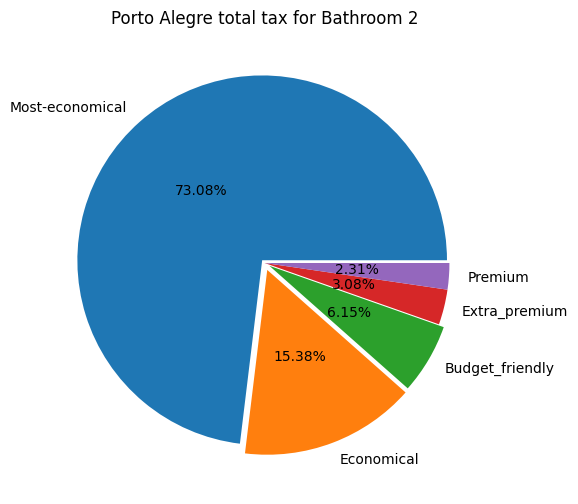

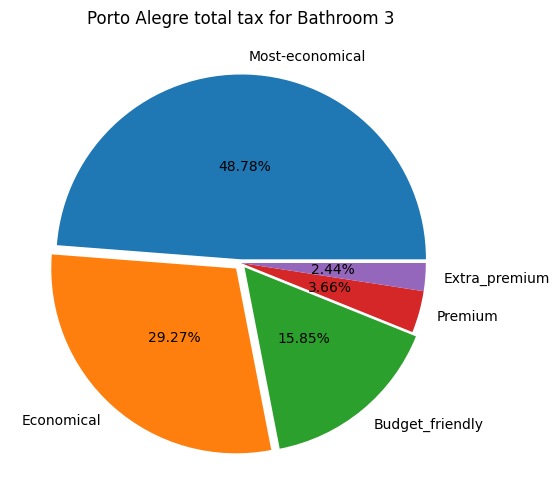

*** Interpretation:As per above plot we can interpret that In Porto Alegre city, house property having bathroom2 and bathroom3 falling under Most- economical or economical category for total taxes.


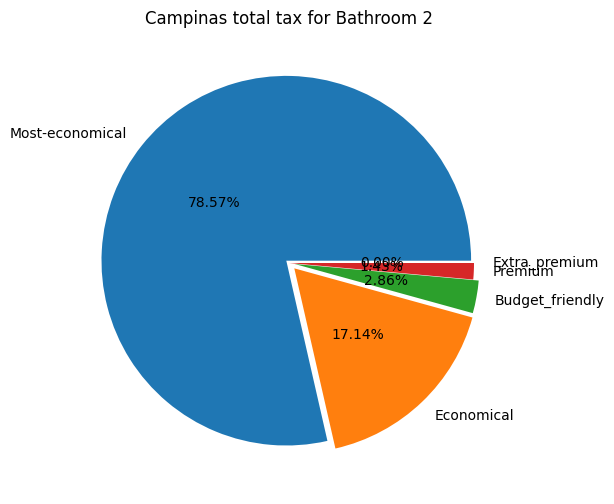

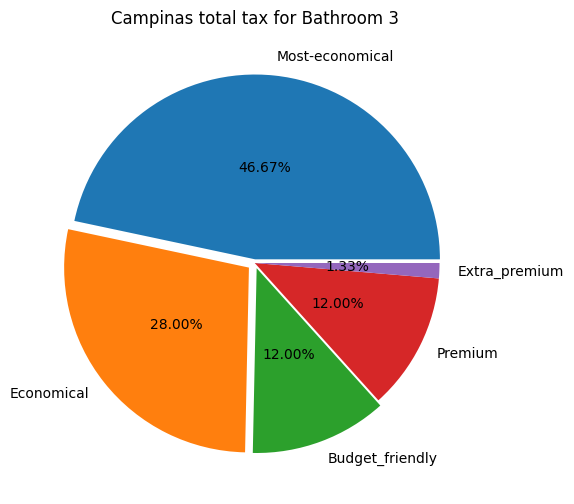

*** Interpretation:As per above plot we can interpret that In Campinas city, house property having bathroom2 and bathroom3 falling under Most- economical or economical category for total taxes.


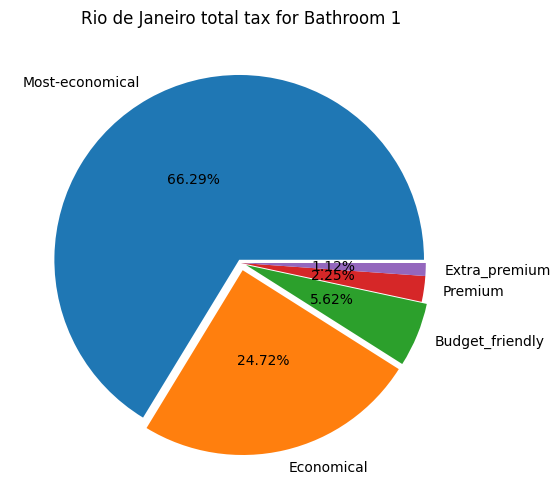

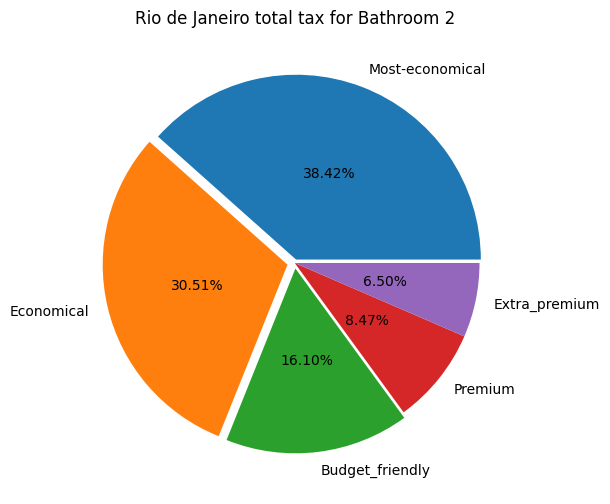

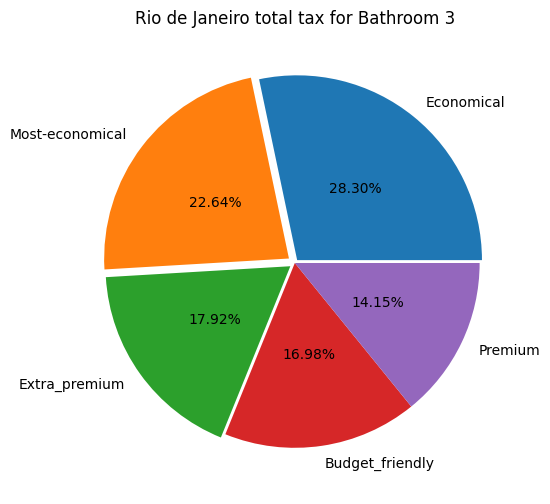

*** Interpretation:As per above plot we can interpret that In Rio de Janeiro city, house property having bathroom1,2 &3 falling under Most- economical or economical category for total taxes.


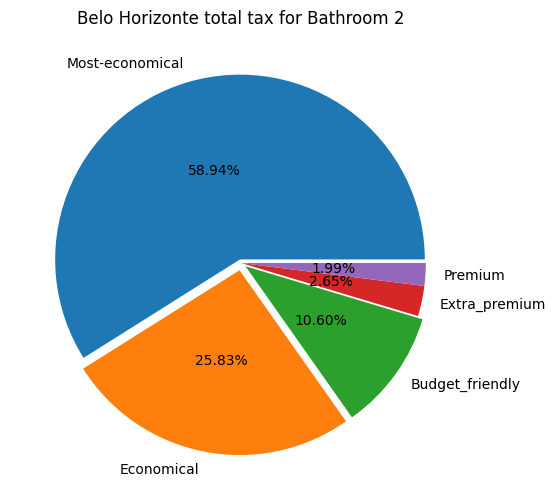

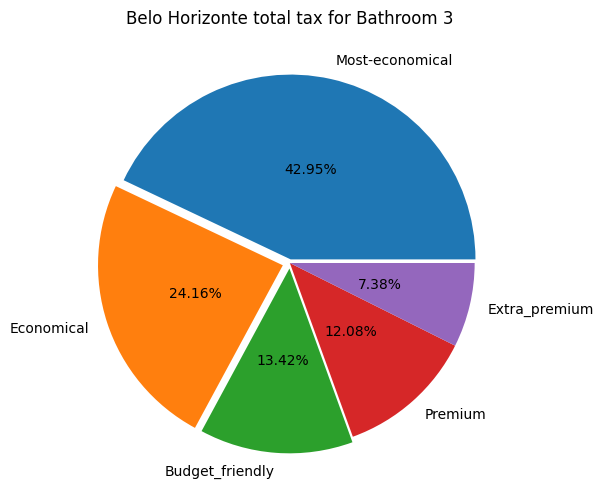

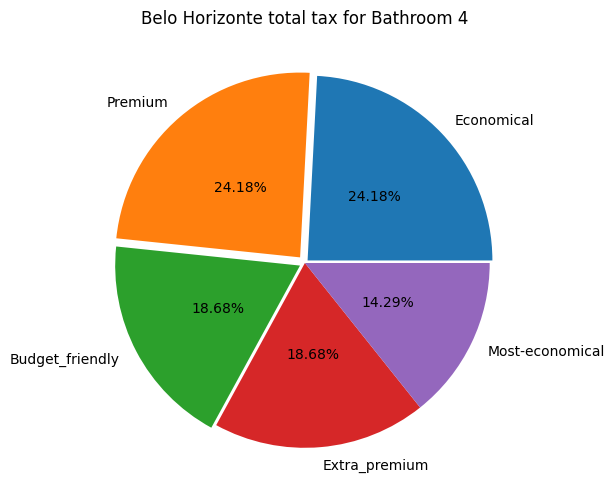

*** Interpretation:As per above plot we can interpret that In Belo Horizonte city, house property having room upto 3 falling under Most- economical or economical category for total taxes.


 *** Final Interpretation:

1.As per above plot we can interpret that In Sao Paulo, house property having bathroom upto 3 falling under Most- economical or economical category for total taxes.
2.As per above plot we can interpret that In Porto Alegre city, house property having bathroom2 and bathroom3 falling under Most- economical or economical category for total taxes.
3.As per above plot we can interpret that In Campinas city, house property having bathroom2 and bathroom3 falling under Most- economical or economical category for total taxes.
4.As per above plot we can interpret that In Rio de Janeiro city, house property having bathroom1,2 &3 falling under Most- economical or economical category for total taxes.
5.As per above plot we can interpret that In Belo Horizonte city, house property havi

In [ ]:
Inter=[]
for j in o_a['city'].unique():
    for i in sorted(o_a[o_a["city"]==j]['bathroom'].unique()):
        if len(o_a[(o_a["city"]==j) & (o_a["bathroom"]==i)])>50 :
            tax_cat = o_a[(o_a["city"]==j) & (o_a["bathroom"]==i)]
            bins = [3093,4562,6031,7500,8969,10438]                                         
            labels = ["Most-economical", "Economical", "Budget_friendly", "Premium", "Extra_premium"]
            data = pd.cut(tax_cat["total (R$)"], bins = bins, labels = labels)
            data = data.value_counts()                        
            pie, ax = plt.subplots(figsize = [10,6])
            plt.pie(x = data,explode = [0.02, 0.04, 0.03, 0,0] ,labels =data.index,autopct='%.2f%%', pctdistance = 0.5)
            plt.title(f"{j} total tax for Bathroom {i}")
            plt.show()
        else:
            pass
    y=input('Provide your interpretation:')
    print(f'*** Interpretation:{y}')
    Inter.append(y)
print(f'\n\n *** Final Interpretation:\n')
for i,j in zip(Inter,range(1,6)):
    print(f'{j}.{i}')

## *** From final Interpretation it is determined that all the cities having bathrooms upto 3 falls under most economical or economical category but if we consider in more than 3 bathroom catergory 'Belo Horizonte city' is most accurately fit.

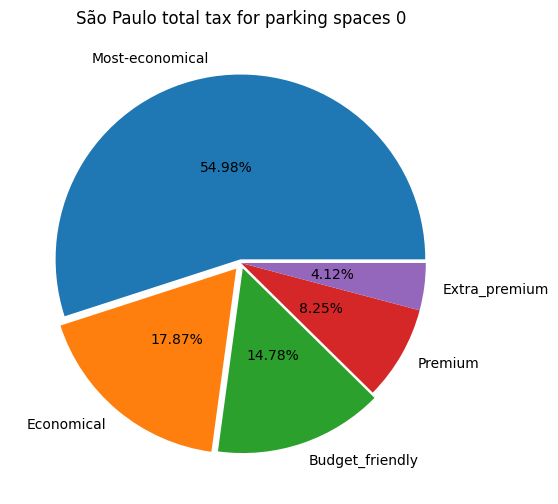

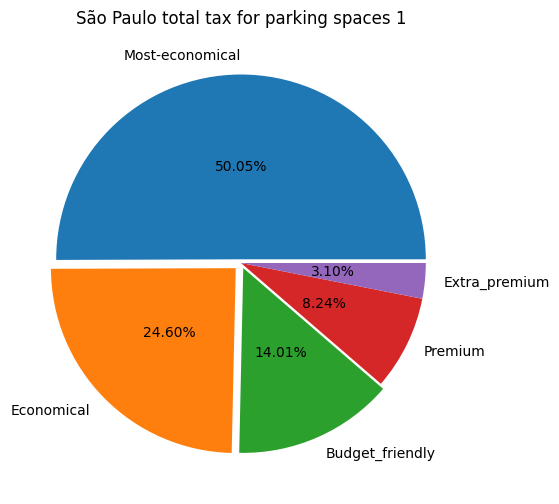

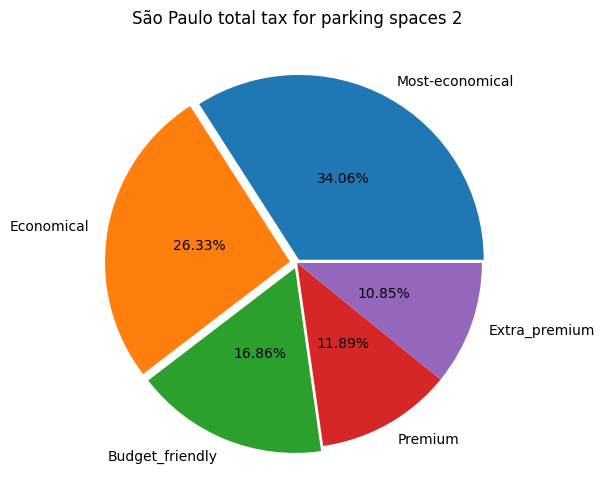

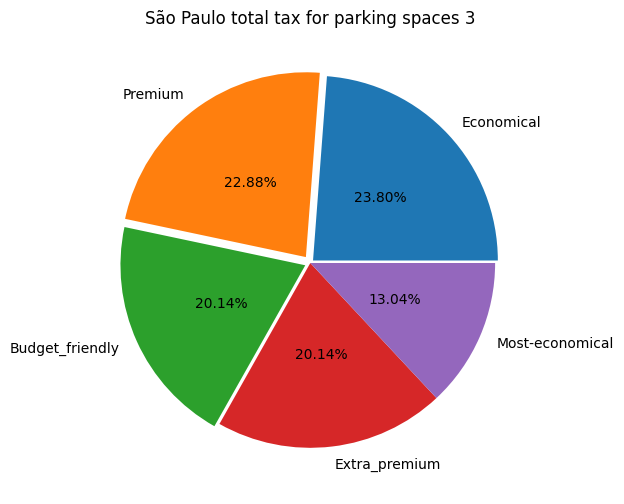

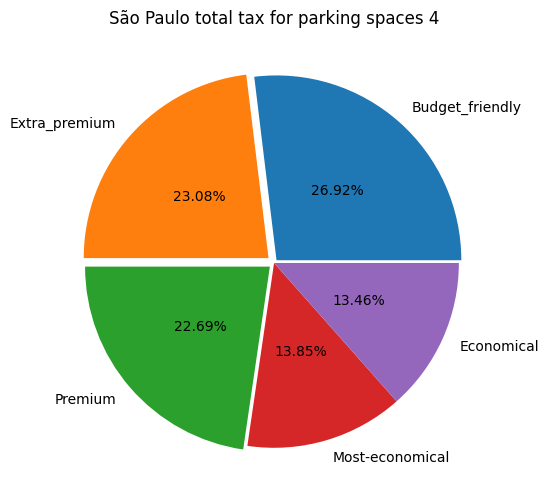

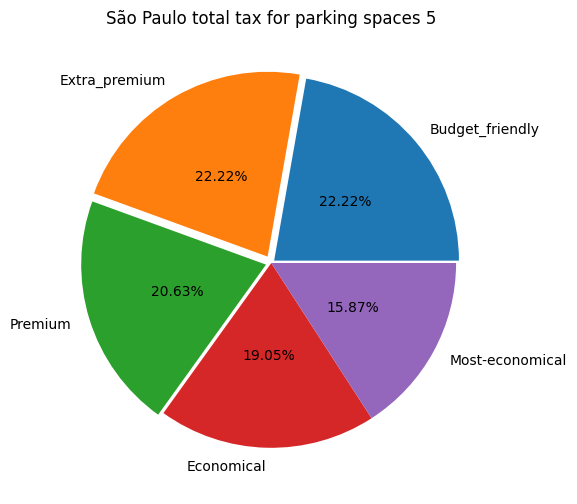

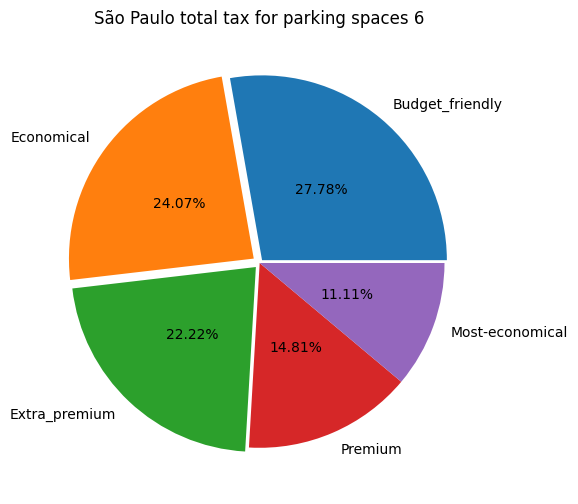

*** Interpretation:As per above plot we can interpret that In Sao paulo city, house property having parking spaces upto 2 falling under Most- economical or economical category .


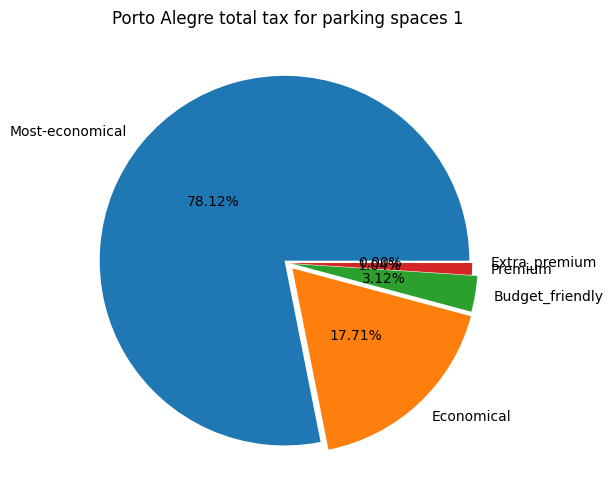

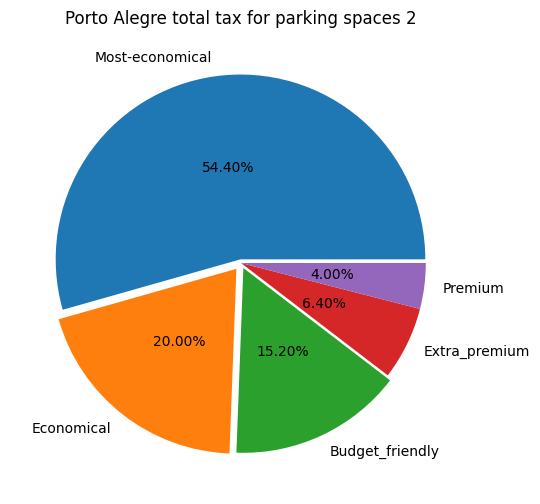

*** Interpretation:As per above plot we can interpret that In Porto Alegre city, house property having parking spaces 1 & 2  falling under Most- economical or economical category.


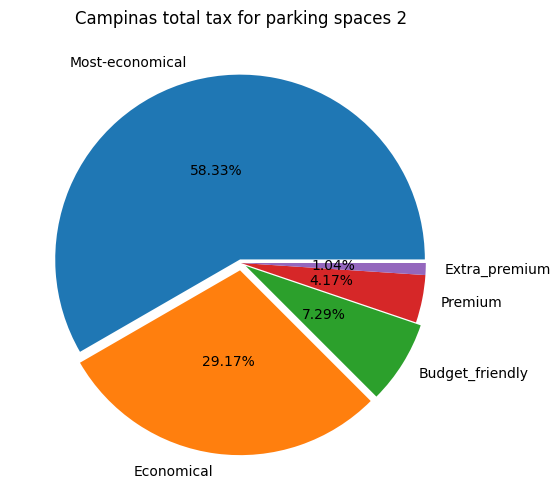

*** Interpretation:As per above plot we can interpret that In Campinas city, house property having 2 parking space falling under Most- economical or economical category.


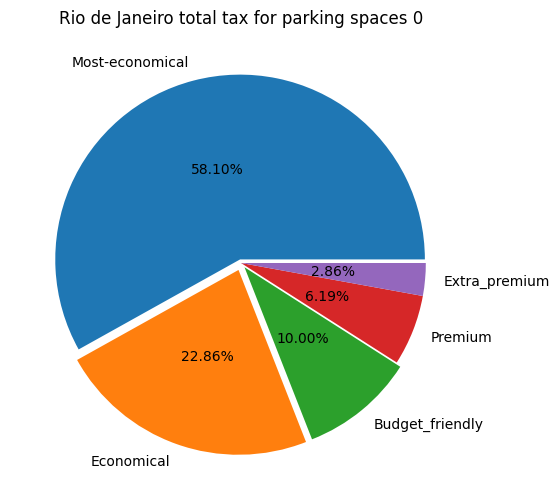

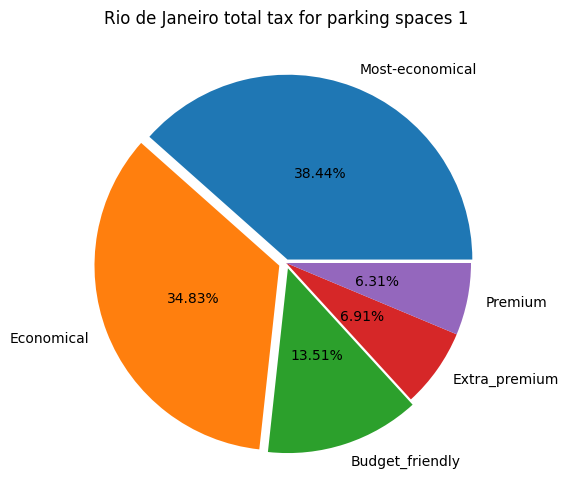

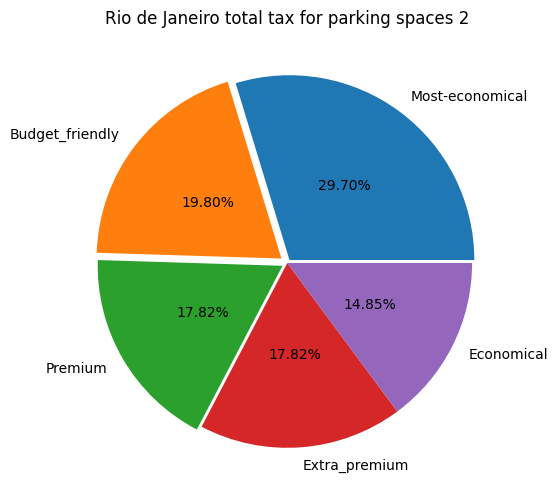

*** Interpretation:As per above plot we can interpret that In Rio de Janeiro city, house property having 0&1 parking spaces falling under Most- economical or economical category.


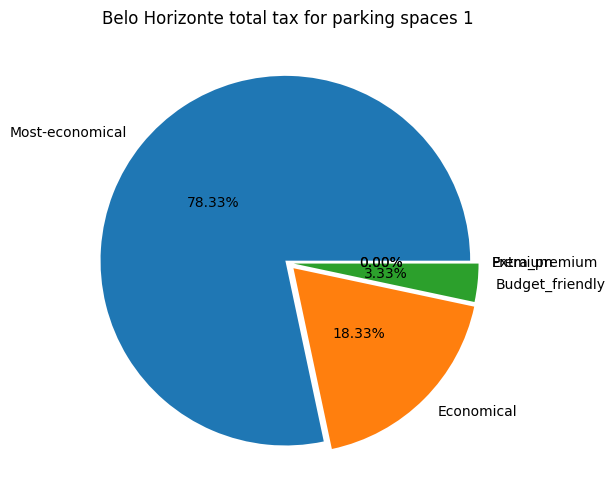

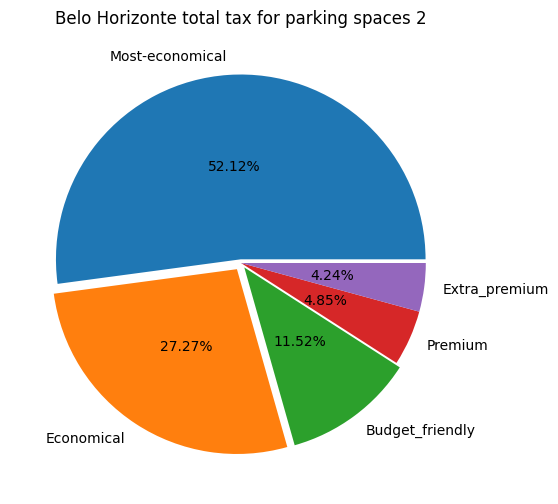

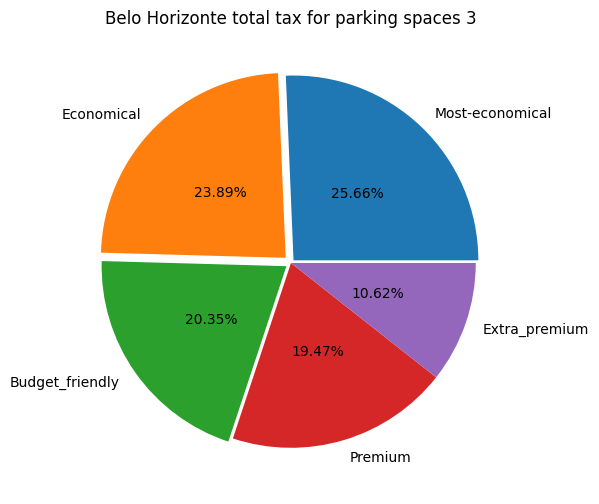

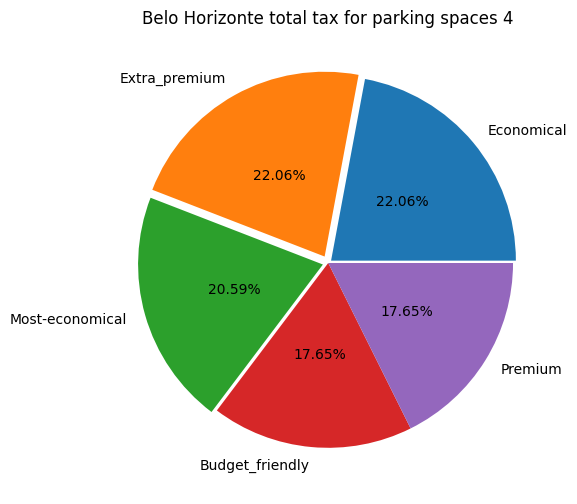

*** Interpretation:As per above plot we can interpret that In Belo Horizonte city, house property parking spaces upto 3 falling under Most- economical or economical category .


 *** Final Interpretation:

1.As per above plot we can interpret that In Sao paulo city, house property having parking spaces upto 2 falling under Most- economical or economical category .
2.As per above plot we can interpret that In Porto Alegre city, house property having parking spaces 1 & 2  falling under Most- economical or economical category.
3.As per above plot we can interpret that In Campinas city, house property having 2 parking space falling under Most- economical or economical category.
4.As per above plot we can interpret that In Rio de Janeiro city, house property having 0&1 parking spaces falling under Most- economical or economical category.
5.As per above plot we can interpret that In Belo Horizonte city, house property parking spaces upto 3 falling under Most- economical or economical categor

In [ ]:
Inter=[]
for j in o_a['city'].unique():
    for i in sorted(o_a[o_a["city"]==j]['parking spaces'].unique()):
        if len(o_a[(o_a["city"]==j) & (o_a["parking spaces"]==i)])>50 :
            tax_cat = o_a[(o_a["city"]==j) & (o_a["parking spaces"]==i)]
            bins = [3093,4562,6031,7500,8969,10438]                                         
            labels = ["Most-economical", "Economical", "Budget_friendly", "Premium", "Extra_premium"]
            data = pd.cut(tax_cat["total (R$)"], bins = bins, labels = labels)
            data = data.value_counts()                        
            pie, ax = plt.subplots(figsize = [10,6])
            plt.pie(x = data,explode = [0.02, 0.04, 0.03, 0,0] ,labels =data.index,autopct='%.2f%%', pctdistance = 0.5)
            plt.title(f"{j} total tax for parking spaces {i}")
            plt.show()
        else:
            pass
    y=input('Provide your interpretation:')
    print(f'*** Interpretation:{y}')
    Inter.append(y)
print(f'\n\n *** Final Interpretation:\n')
for i,j in zip(Inter,range(1,6)):
    print(f'{j}.{i}')

## *** From final Interpretation it is determined that 'BELO HORIZONTE CITY' falls under most economical or economical category based on no. of parking spaces.

## ------------------------------